<a href="https://colab.research.google.com/github/w4bo/teaching-handsondatapipelines/blob/main/materials/15-BreastCancer.solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The `BreastCancer` challenge

### Goal

It is your job to predict the `diagnosis` for each data item.

### Metric

Submissions are evaluated using the accuracy score. When splitting train and test datasets, the test dataset should contain 30% of the data.

### Requirements

You are allowed to use `numpy`, `pandas`, `matplotlib`, `sns`, and `sk-learn` Python libraries. You can import any model from `sk-learn`.

In [46]:
# Import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # for the check the error and accuracy of the model
import random
import os

# SEED all random generators
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# read the data
# df = pd.read_csv("datasets/breastcancer.csv")
df = pd.read_csv("https://raw.githubusercontent.com/w4bo/teaching-handsondatapipelines/main/materials/datasets/breastcancer.csv")

## Data understanding

Hints

- There are 569 observations with 30 features each
- Each observation is labelled with a `diagnosis`

Take a first glance to the dataset
- Do we consider all features?
- Are there null values?
- Which are the attribute types?
- Which are the attribute ranges?
- How many labels?
- Are classes unbalanced?



In [47]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Feature semantics

Hint:
- id of the observation
- diagnosis (M = malignant, B = benign)
- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

`*_mean`: the means of all cells

`*_se`: standard error of all cells

`*_worst`: the worst cell


In [49]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [50]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis'>

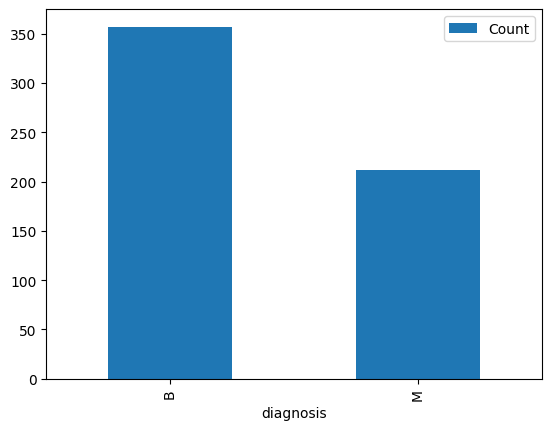

In [51]:
df['diagnosis'].value_counts().plot(kind="bar", label="Count", legend=True)

<Axes: xlabel='diagnosis', ylabel='count'>

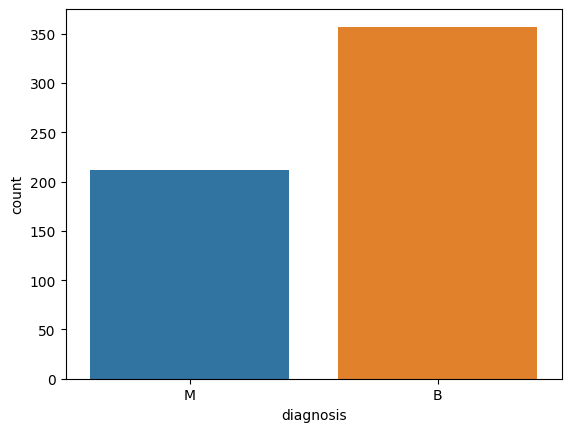

In [52]:
sns.countplot(data=df, x='diagnosis', hue='diagnosis')

### Summing up

| Question | Answer | Do we need action? |
| -        | -      | - |
| Are there null values? | Yes | No need for imputation, drop the column |
| Which are the attribute types? | All attributes are numeric but `diagnosis` | Encode diagnosis |
| Which are the attribute ranges? | Attribute ranges are similar | We could apply normalization |
| How many labels? | 2 | - |
| Are classes unbalanced? | No, classess are almost equally distributed | No rebalancing |

## Data preprocessing

Drop the unnecessary columns

In [53]:
# `Unnamed:32` has 0 non null objects, all values are null. Drop the column
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [54]:
# map the diagnosis column to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

### Data visualization

- Check the attribute's distribution
- Check the relationships between attributes (e.g., the correlation). Should we keep all attributes?

For now, let's just focus on `*_mean` attributes

In [55]:
# Data can be divided into three parts (i.e., families of columns)
features_mean = list(df.columns[1:11]) + ["diagnosis"]
features_se = list(df.columns[11:20]) + ["diagnosis"]
features_worst = list(df.columns[21:31]) + ["diagnosis"]
print("features_mean: " + str(features_mean))
print("features_se: " + str(features_se))
print("features_worst: " + str(features_worst))

features_mean: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis']
features_se: ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'diagnosis']
features_worst: ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


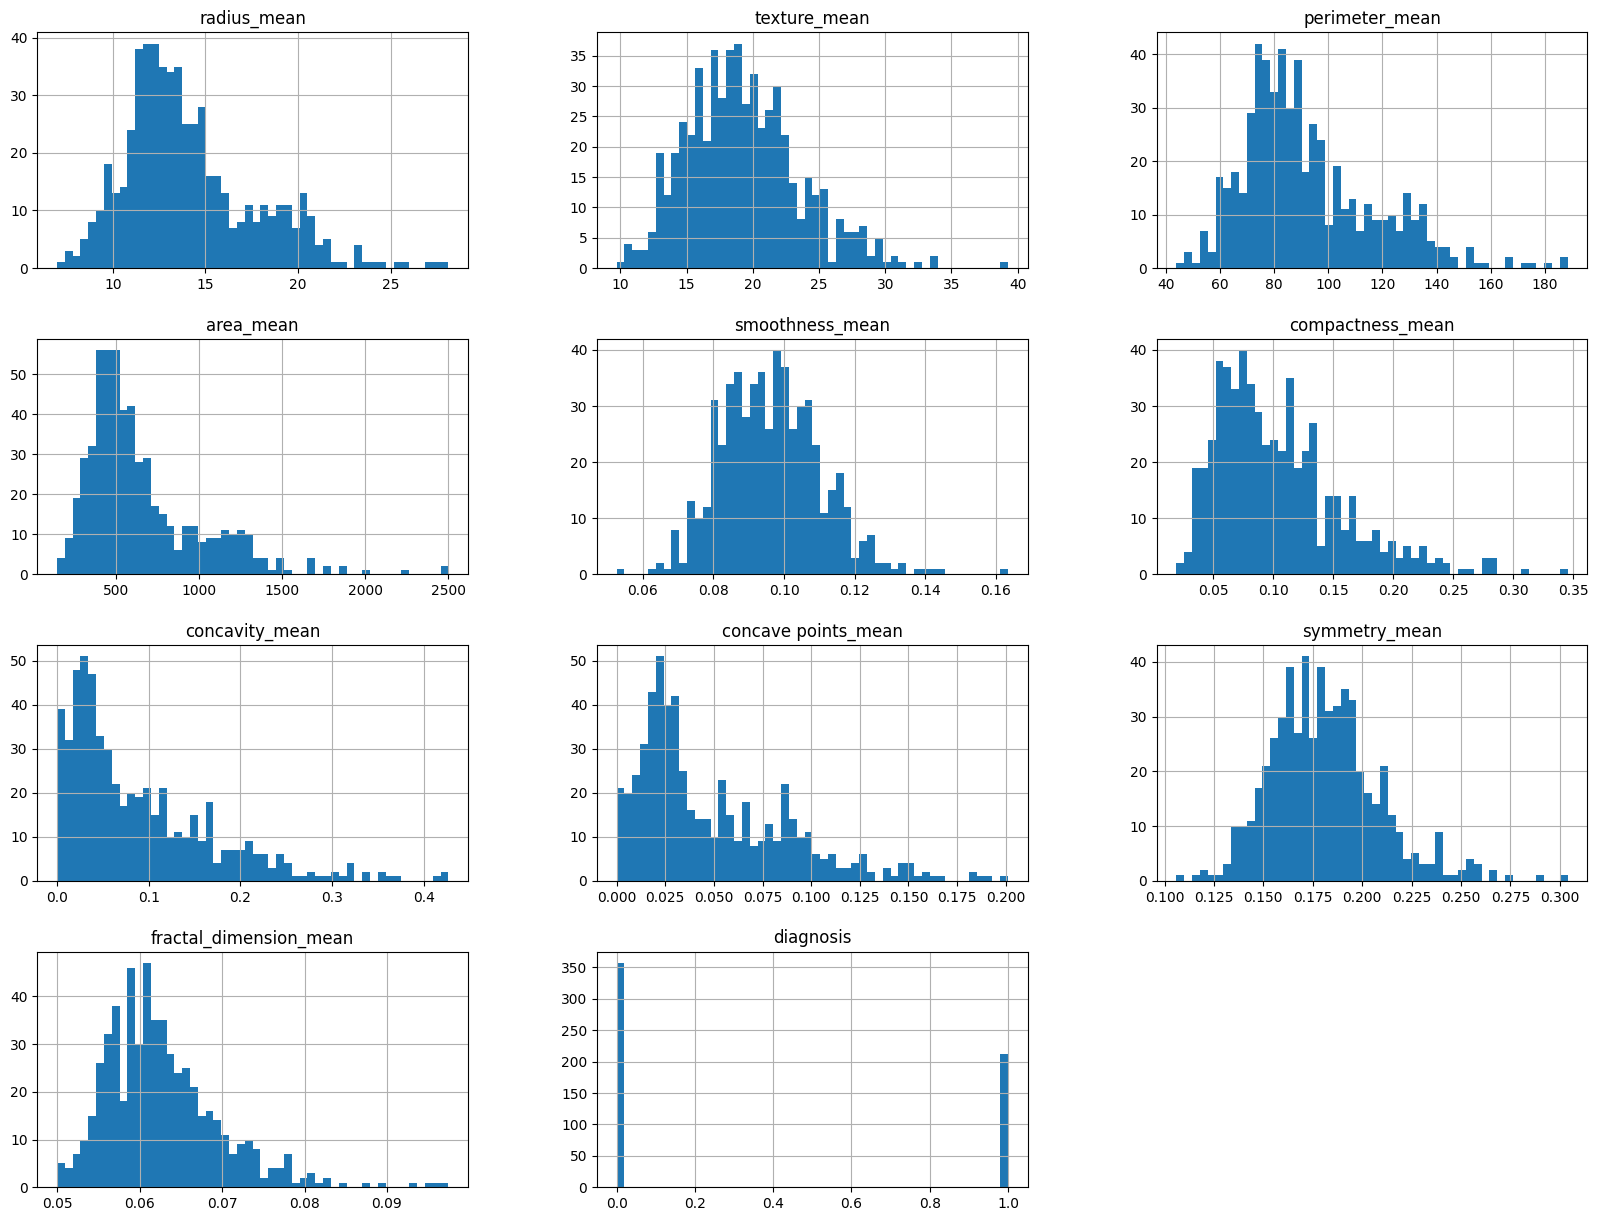

In [56]:
df[features_mean].hist(bins=50, figsize=(20,15))
plt.show()

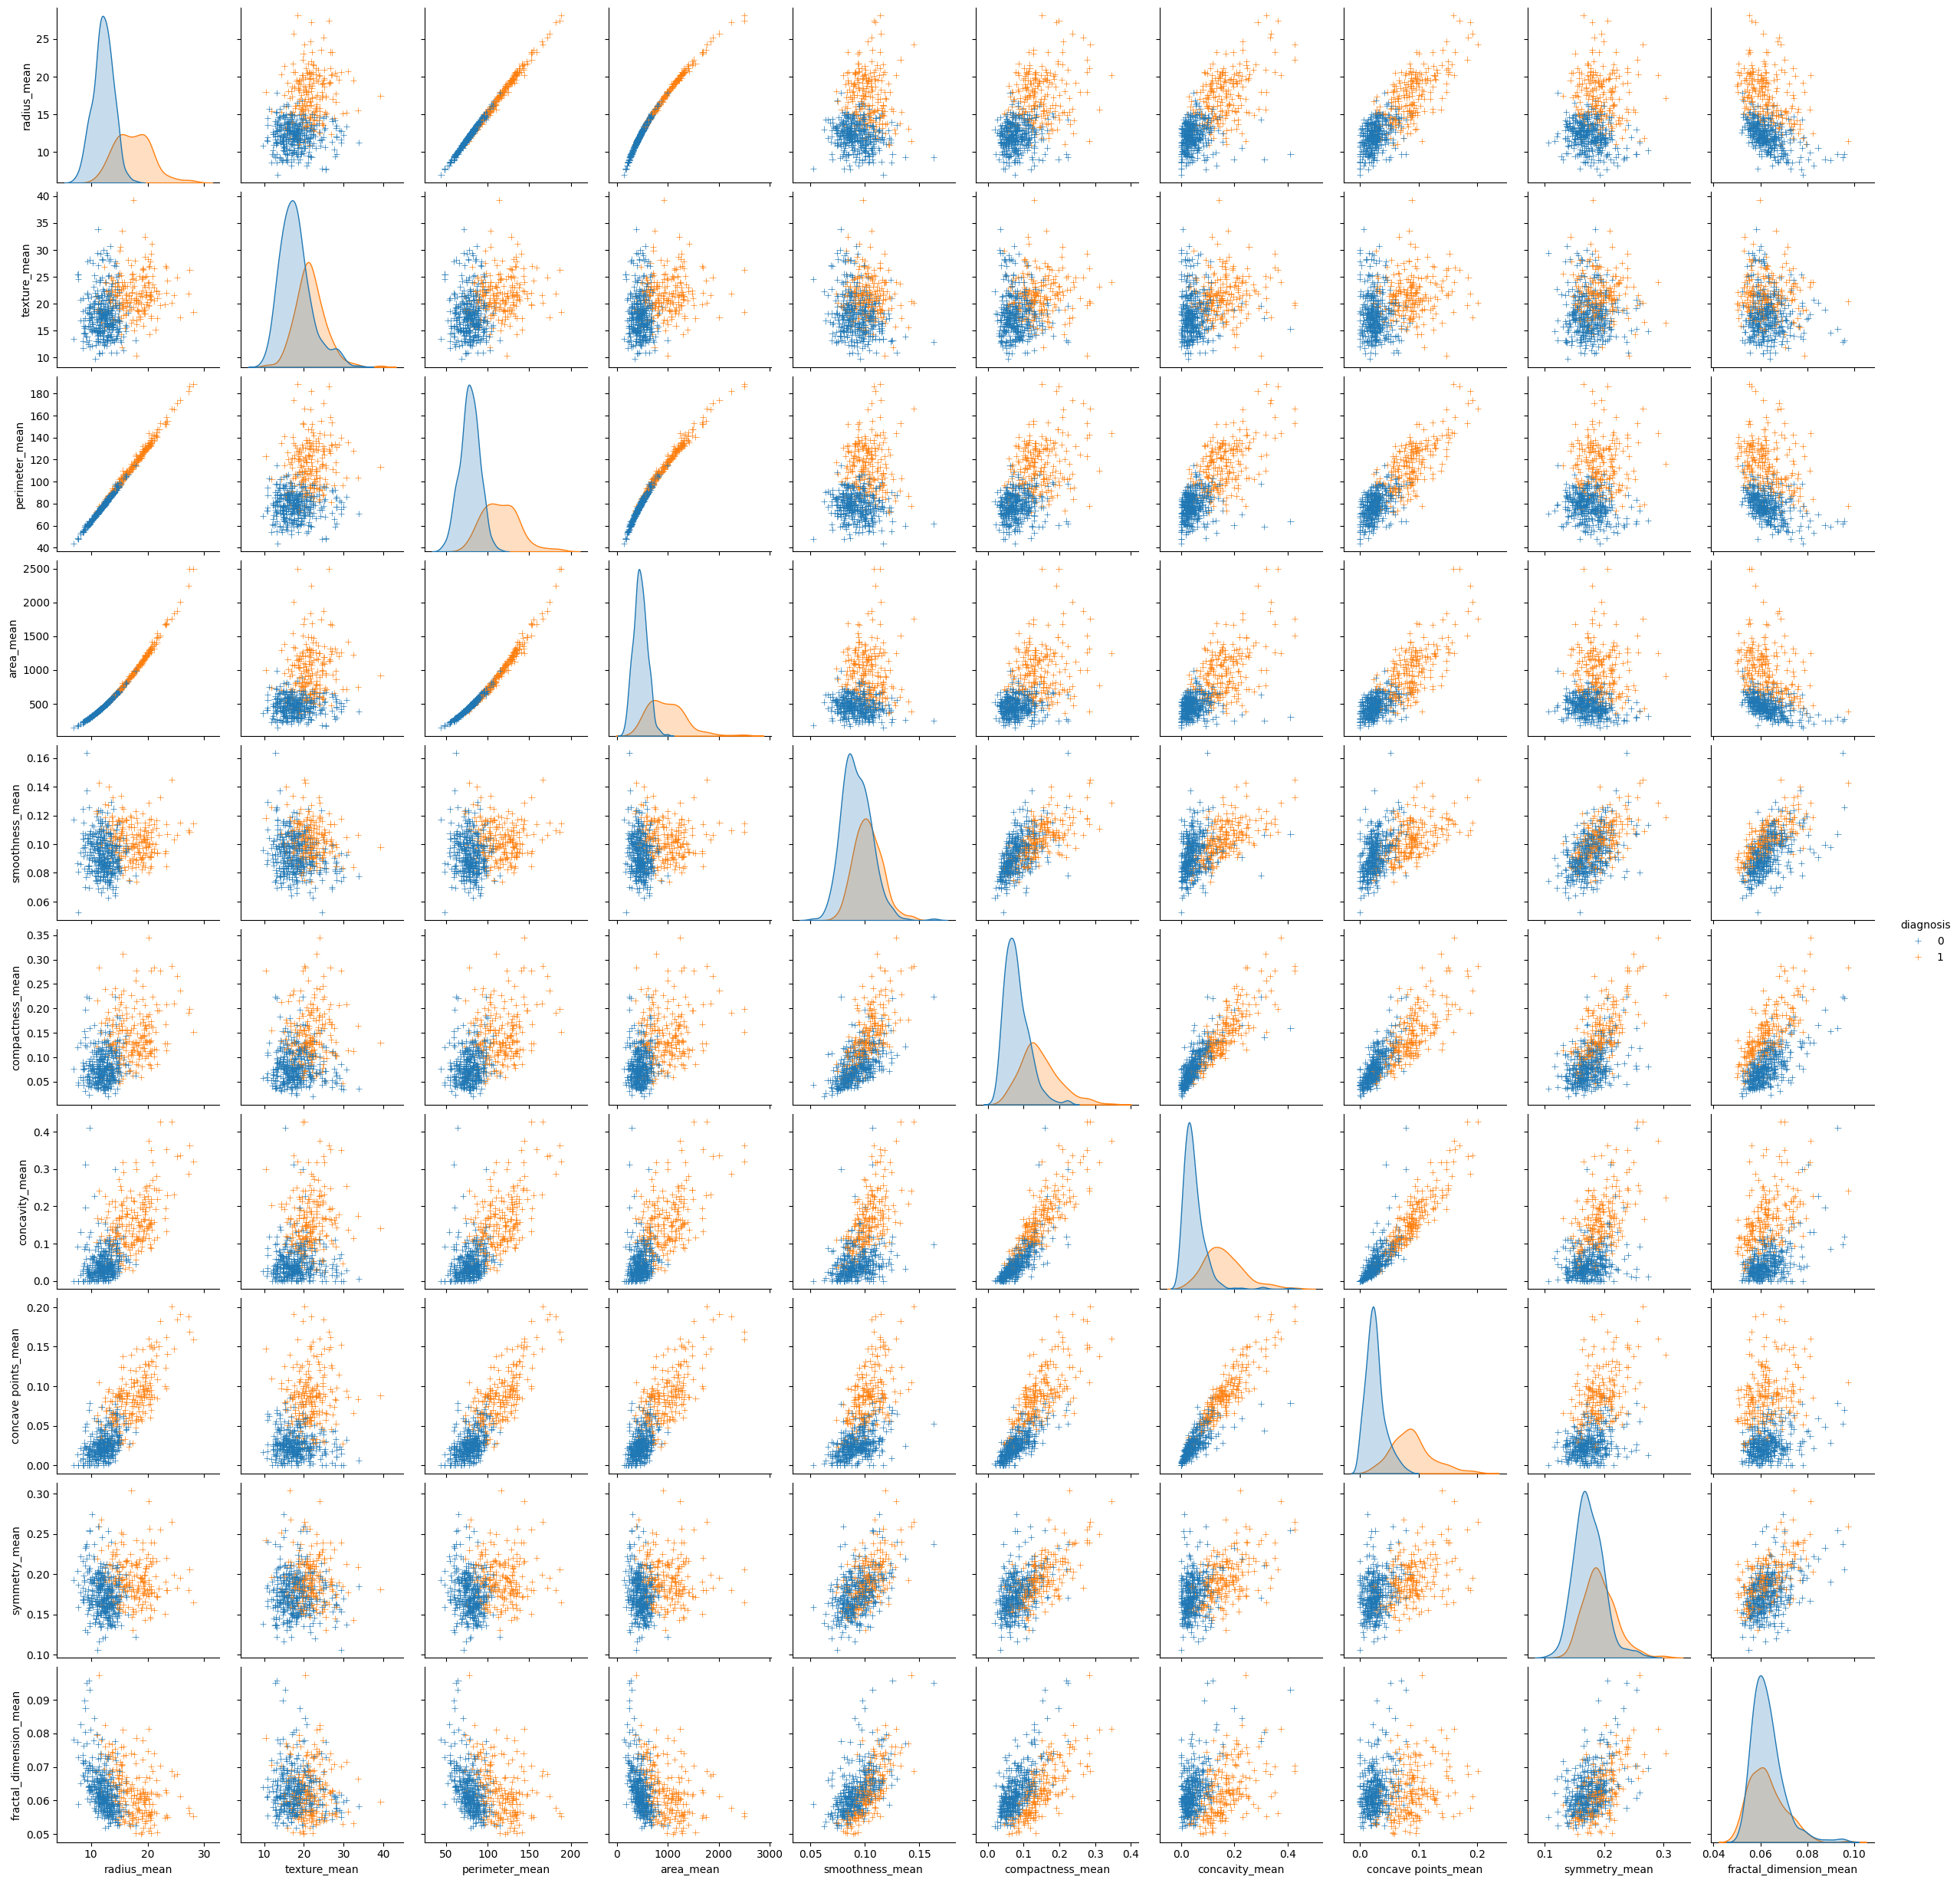

In [57]:
g = sns.pairplot(df[features_mean], hue='diagnosis', markers='+')
plt.show()

In [58]:
# df[features_se].hist(bins=50, figsize=(20,15))
# plt.show()

In [59]:
# g = sns.pairplot(df[features_se], hue='diagnosis', markers='+')
# plt.show()

In [60]:
#  df[features_worst].hist(bins=50, figsize=(20,15))
# plt.show()

In [61]:
# g = sns.pairplot(df[features_worst], hue='diagnosis', markers='+')
# plt.show()

In [62]:
df = df[features_mean]
from scipy.stats import pearsonr
rho = df.corr(method ='pearson')
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01, 0.05, 0.1] if x <= t]))
rho.round(2).astype(str) + p

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.0***,0.32***,1.0***,0.99***,0.17***,0.51***,0.68***,0.82***,0.15***,-0.31***,0.73***
texture_mean,0.32***,1.0***,0.33***,0.32***,-0.02,0.24***,0.3***,0.29***,0.07*,-0.08*,0.42***
perimeter_mean,1.0***,0.33***,1.0***,0.99***,0.21***,0.56***,0.72***,0.85***,0.18***,-0.26***,0.74***
area_mean,0.99***,0.32***,0.99***,1.0***,0.18***,0.5***,0.69***,0.82***,0.15***,-0.28***,0.71***
smoothness_mean,0.17***,-0.02,0.21***,0.18***,1.0***,0.66***,0.52***,0.55***,0.56***,0.58***,0.36***
compactness_mean,0.51***,0.24***,0.56***,0.5***,0.66***,1.0***,0.88***,0.83***,0.6***,0.57***,0.6***
concavity_mean,0.68***,0.3***,0.72***,0.69***,0.52***,0.88***,1.0***,0.92***,0.5***,0.34***,0.7***
concave points_mean,0.82***,0.29***,0.85***,0.82***,0.55***,0.83***,0.92***,1.0***,0.46***,0.17***,0.78***
symmetry_mean,0.15***,0.07*,0.18***,0.15***,0.56***,0.6***,0.5***,0.46***,1.0***,0.48***,0.33***
fractal_dimension_mean,-0.31***,-0.08*,-0.26***,-0.28***,0.58***,0.57***,0.34***,0.17***,0.48***,1.0***,-0.01


<Axes: >

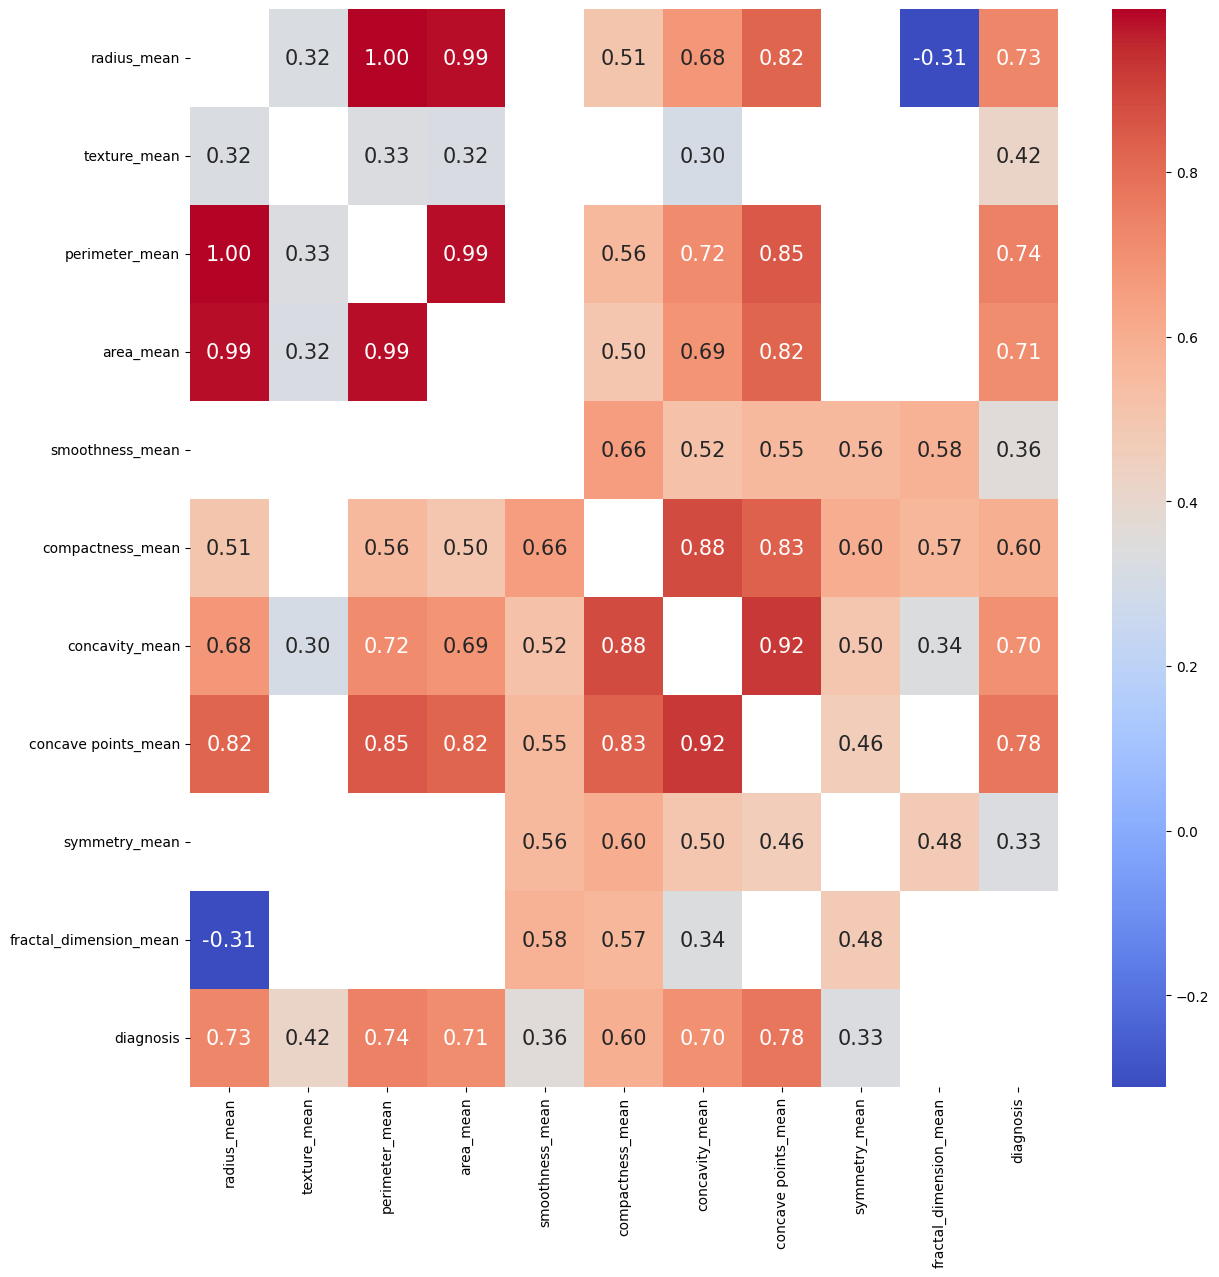

In [63]:
min_corr = 0.3
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(14, 14))
sns.heatmap(kot, cmap=sns.color_palette("coolwarm", as_cmap=True), annot=True, fmt= '.2f',annot_kws={'size': 15})

### Should we drop some attributes?

- `radius_mean`, `perimeter_mean`, and `area_mean` are highly correlated, keep `permiter`
- `compactness_mean`, `concavity_mean` and `concavepoint_mean` are highly correlated, keep `compactness_mean`

In [64]:
# now these are the variables that we will use for prediction
prediction_var = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']

## Modeling with scikit-learn

Preparing the dataset for the ML pipeline.
- X: the dataset
- y: the labels

In [65]:
def set_dataset(feature_list, normalize=False):
    X = df[[x for x in feature_list if x != "diagnosis"]]
    y = df['diagnosis']

    if normalize:
      X = (X - X.mean()) / X.std()

    # print(X.head())
    print(X.shape)
    # print(y.head())
    print(y.shape)
    return X, y

X, y = set_dataset(prediction_var, True)

(569, 5)
(569,)


In [66]:
X

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean
0,-2.071512,1.268817,1.567087,3.280628,2.215566
1,-0.353322,1.684473,-0.826235,-0.486643,0.001391
2,0.455786,1.565126,0.941382,1.052000,0.938859
3,0.253509,-0.592166,3.280667,3.399917,2.864862
4,-1.150804,1.775011,0.280125,0.538866,-0.009552
...,...,...,...,...,...
564,0.720838,2.058974,1.040926,0.218868,-0.312314
565,2.083301,1.614511,0.102368,-0.017817,-0.217473
566,2.043775,0.672084,-0.839745,-0.038646,-0.808406
567,2.334403,1.980781,1.524426,3.269267,2.135315


In [67]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## Split the dataset into a training set and a testing set

### Advantages
- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.
- More flexible and faster than creating a model using all of the dataset for training.

### Disadvantages
- The accuracy scores for the testing set can vary depending on what observations are in the set.
- This disadvantage can be countered using k-fold cross-validation.

### Notes
- The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
- As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
- If a model is too complex or not complex enough, the testing accuracy is lower.
- For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(398, 5)
(398,)
(171, 5)
(171,)


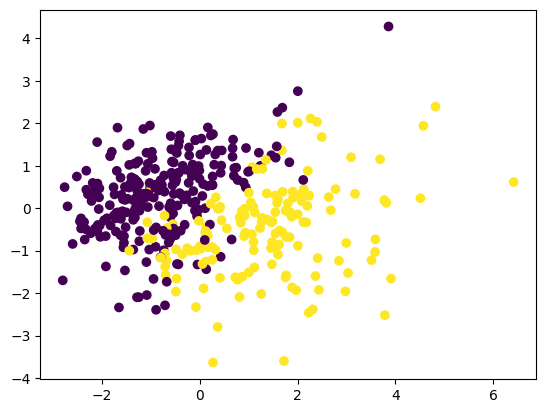

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X_train)

plt.scatter(
    x=result[:,0],
    y=result[:,1] ,
    c=y_train,
    cmap='viridis'
)

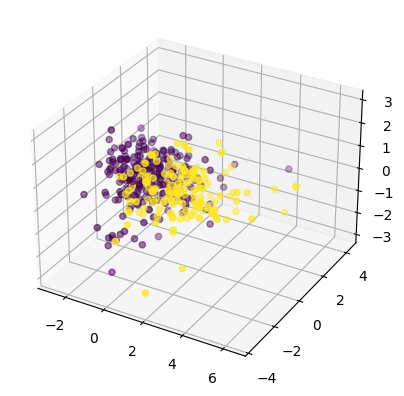

In [70]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

pca = PCA(n_components=3)
result = pca.fit_transform(X_train)

ax.scatter(
    xs=result[:,0],
    ys=result[:,1],
    zs=result[:,2],
    c=y_train,
    cmap='viridis'
)

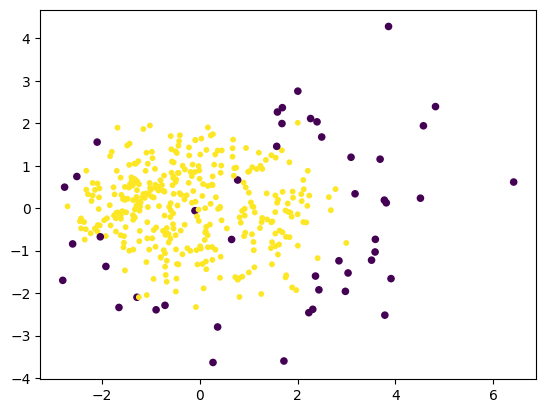

In [71]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(X_train)
is_outlier = clf.predict(X_train)

plt.scatter(
    x=result[:,0],
    y=result[:,1],
    s=[10 if x > 0 else 20 for x in is_outlier],
    c=is_outlier,
    cmap='viridis'
)

In [72]:
# all parameters not specified are set to their defaults
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9532163742690059

Fit your model and try it with several parameters

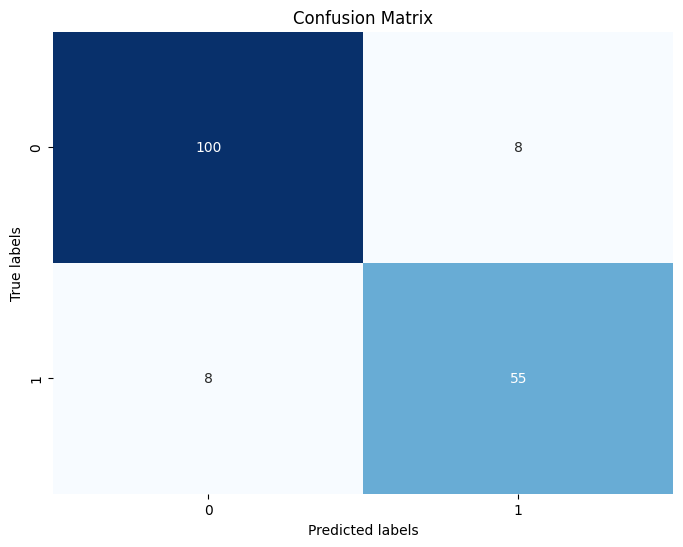

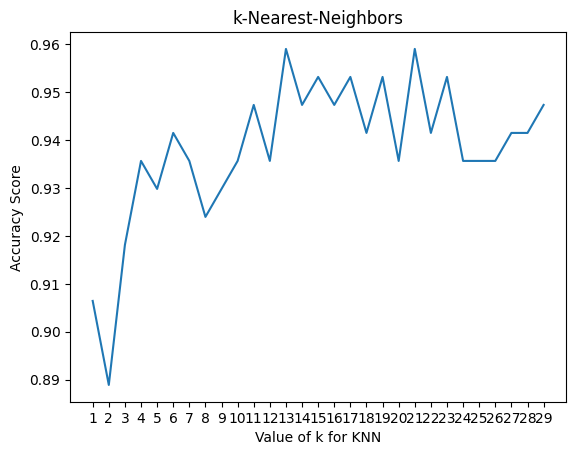

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [73]:
from sklearn.metrics import confusion_matrix
def fit_knn(X_train, y_train, X_test, y_test):
    # experimenting with different k values
    k_range = list(range(1, 30))
    scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
        if k == 1:
            # Compute confusion matrix
            conf_matrix = confusion_matrix(y_test, y_pred)
            # Plot confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
            plt.xlabel('Predicted labels')
            plt.ylabel('True labels')
            plt.title('Confusion Matrix')
            plt.show()
    plt.plot(k_range, scores)
    plt.xticks(k_range)
    plt.xlabel('Value of k for KNN')
    plt.ylabel('Accuracy Score')
    plt.title('k-Nearest-Neighbors')
    plt.show()
    return y_pred

fit_knn(X_train, y_train, X_test, y_test)

What if I compare the model vs the model trained on the training set only?

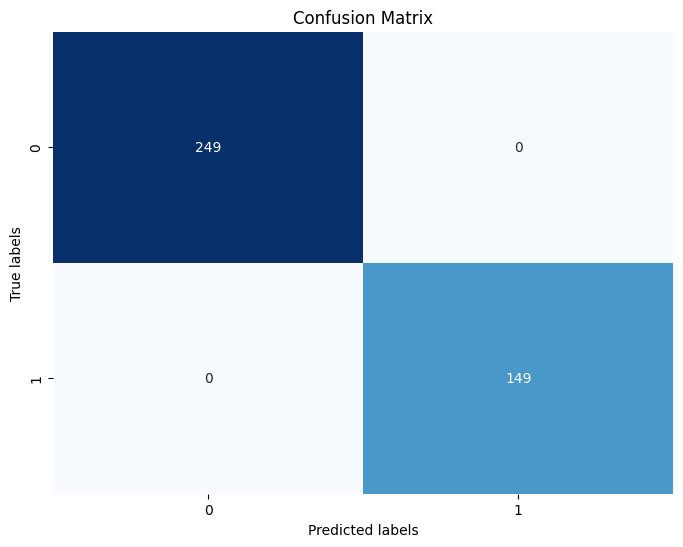

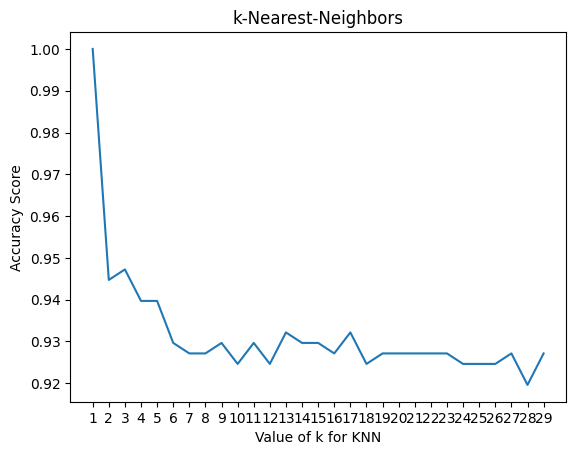

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [74]:
fit_knn(X_train, y_train, X_train, y_train)

What if I choose a more complex model?

In [75]:
def fit_forest(X_train, y_train, X_test, y_test):
    model=RandomForestClassifier(n_estimators=100) # a simple random forest model
    model.fit(X_train, y_train) # now fit our model for training data
    y_pred = model.predict(X_test) # predict for the test data
    # prediction will contain the predicted value by our model predicted values of dignosis column for test inputs
    print("Accuracy: " + str(metrics.accuracy_score(y_pred, y_test))) # to check the accuracy
    # here we will use accuracy measurement between our predicted value and our test output values
    featimp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\nFeatures sorted by descending importance:")
    print(featimp) # this is the property of Random Forest classifier that it provide us the importance of the features used

fit_forest(X_train, y_train, X_test, y_test)

Accuracy: 0.9707602339181286

Features sorted by descending importance:
perimeter_mean      0.494754
compactness_mean    0.212594
texture_mean        0.147130
smoothness_mean     0.079314
symmetry_mean       0.066209
dtype: float64


Now lets do this for all `feature_mean` so that from Random forest we can get the feature which are important

In [76]:
X, y = set_dataset(features_mean, True) # taking all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
fit_forest(X_train, y_train, X_test, y_test)

(569, 10)
(569,)
Accuracy: 0.9590643274853801

Features sorted by descending importance:
concave points_mean       0.203678
area_mean                 0.172557
perimeter_mean            0.161725
concavity_mean            0.158301
texture_mean              0.087521
radius_mean               0.072906
compactness_mean          0.066549
smoothness_mean           0.033087
fractal_dimension_mean    0.023854
symmetry_mean             0.019823
dtype: float64


What if we use cross-validation?

https://scikit-learn.org/stable/modules/cross_validation.html

In [77]:
from sklearn.model_selection import cross_val_score

def cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=5)
    print("Scores: " + str(scores))
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model = RandomForestClassifier(n_estimators=100)
cv(model, X, y)

Scores: [0.89473684 0.94736842 0.94736842 0.98245614 0.95575221]
0.95 accuracy with a standard deviation of 0.03


In [78]:
model = KNeighborsClassifier(n_neighbors=10)
cv(model, X, y)

Scores: [0.92105263 0.94736842 0.94736842 0.97368421 0.92035398]
0.94 accuracy with a standard deviation of 0.02


Grid search

In [79]:
# lets Make a function for Grid Search CV
def gridsearch_cv(model,param_grid, X_train, y_train):
    clf = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=2)
    clf.fit(X_train, y_train)
    print("The best parameters are:")
    print(clf.best_params_)
    print("The best estimator is " + str(clf.best_estimator_))
    print("The best score is " + str(clf.best_score_))

In [80]:
model = KNeighborsClassifier()

k_range = list(range(1, 30, 3))
leaf_size = list(range(1, 30, 3))
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size} #, 'weights': ['uniform', 'distance']}

gridsearch_cv(model, param_grid, X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are:
{'leaf_size': 1, 'n_neighbors': 16}
The best estimator is KNeighborsClassifier(leaf_size=1, n_neighbors=16)
The best score is 0.9455364073901567


In [81]:
model = RandomForestClassifier()

estimator_range = [10, 50, 100]
param_grid = {'n_estimators': estimator_range}

gridsearch_cv(model, param_grid, X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
The best parameters are:
{'n_estimators': 100}
The best estimator is RandomForestClassifier()
The best score is 0.9455364073901567


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create a pipeline with scaling and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the features
    ('svc', SVC())                 # Step 2: Apply Support Vector Classifier
])


# Define the parameter grid to search
param_grid = {
    'svc__C': [0.1, 1, 10],                  # Different values of C for SVC
    'svc__kernel': ['linear', 'rbf', 'poly'] # Different kernel functions for SVC
}

# Create a GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_
y_pred = grid_search.predict(X_test)
print("The best parameters are:")
print(grid_search.best_params_)
print("The best estimator is " + str(grid_search.best_estimator_))
print("The best score is " + str(grid_search.best_score_))


The best parameters are:
{'svc__C': 10, 'svc__kernel': 'rbf'}
The best estimator is Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])
The best score is 0.9471835443037975


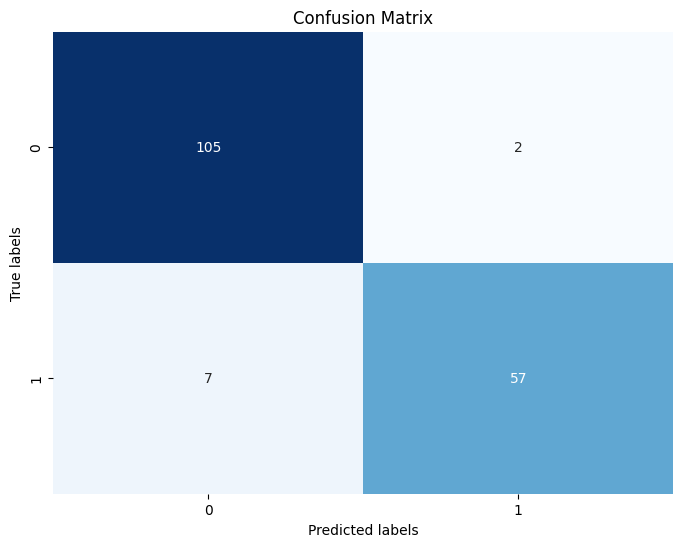

In [83]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 3.8 MB/s eta 0:00:00
[flaml.automl.logger: 04-23 13:30:31] {1680} INFO - task = classification
[flaml.automl.logger: 04-23 13:30:31] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 04-23 13:30:31] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-23 13:30:31] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-23 13:30:31] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-23 13:30:31] {2345} INFO - Estimated sufficient time budget=1197s. Estimated necessary time budget=28s.
[flaml.automl.logger: 04-23 13:30:31] {2392} INFO -  at 0.2s,	estimator lgbm's best error=0.1180,	best estimator lgbm's best error=0.1180
[flaml.automl.logger: 04-23 13:30:31] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-23 13:30:32] {2392} INFO -  at 0.2s,	estimator lgbm's best error=

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 04-23 13:32:07] {2392} INFO -  at 95.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:07] {2219} INFO - iteration 458, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:07] {2392} INFO -  at 95.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:07] {2219} INFO - iteration 459, current learner lrl1
[flaml.automl.logger: 04-23 13:32:07] {2392} INFO -  at 95.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:07] {2219} INFO - iteration 460, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:07] {2392} INFO -  at 95.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:07] {2219} INFO - iteration 461, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:07] {2392} INFO -  at 95.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:07] {2219} INFO - iteration 462, current learner lrl1
[flaml.automl.logger: 04-23 13:32:07] {2392} INFO -  at 96.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:07] {2219} INFO - iteration 463, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:07] {2392} INFO -  at 96.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:07] {2219} INFO - iteration 464, current learner lrl1
[flaml.automl.logger: 04-23 13:32:08] {2392} INFO -  at 96.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:08] {2219} INFO - iteration 465, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:08] {2392} INFO -  at 96.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:08] {2219} INFO - iteration 466, current learner lrl1
[flaml.automl.logger: 04-23 13:32:08] {2392} INFO -  at 96.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:08] {2219} INFO - iteration 467, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:08] {2392} INFO -  at 96.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:08] {2219} INFO - iteration 468, current learner lrl1
[flaml.automl.logger: 04-23 13:32:08] {2392} INFO -  at 96.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:08] {2219} INFO - iteration 469, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:08] {2392} INFO -  at 96.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:08] {2219} INFO - iteration 470, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:08] {2392} INFO -  at 97.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:08] {2219} INFO - iteration 471, current learner lrl1
[flaml.automl.logger: 04-23 13:32:08] {2392} INFO -  at 97.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:08] {2219} INFO - iteration 472, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:09] {2392} INFO -  at 97.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:09] {2219} INFO - iteration 473, current learner lrl1
[flaml.automl.logger: 04-23 13:32:09] {2392} INFO -  at 97.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:09] {2219} INFO - iteration 474, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:09] {2392} INFO -  at 97.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:09] {2219} INFO - iteration 475, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:09] {2392} INFO -  at 97.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:09] {2219} INFO - iteration 476, current learner lrl1
[flaml.automl.logger: 04-23 13:32:09] {2392} INFO -  at 97.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:09] {2219} INFO - iteration 477, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:09] {2392} INFO -  at 98.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:09] {2219} INFO - iteration 478, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:09] {2392} INFO -  at 98.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:09] {2219} INFO - iteration 479, current learner lrl1
[flaml.automl.logger: 04-23 13:32:10] {2392} INFO -  at 98.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:10] {2219} INFO - iteration 480, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:10] {2392} INFO -  at 98.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:10] {2219} INFO - iteration 481, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:10] {2392} INFO -  at 98.6s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:10] {2219} INFO - iteration 482, current learner lrl1
[flaml.automl.logger: 04-23 13:32:10] {2392} INFO -  at 98.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:10] {2219} INFO - iteration 483, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:10] {2392} INFO -  at 98.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:10] {2219} INFO - iteration 484, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:11] {2392} INFO -  at 99.3s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:11] {2219} INFO - iteration 485, current learner lrl1
[flaml.automl.logger: 04-23 13:32:11] {2392} INFO -  at 99.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:11] {2219} INFO - iteration 486, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:11] {2392} INFO -  at 99.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:11] {2219} INFO - iteration 487, current learner lrl1
[flaml.automl.logger: 04-23 13:32:11] {2392} INFO -  at 99.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:11] {2219} INFO - iteration 488, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:11] {2392} INFO -  at 99.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:11] {2219} INFO - iteration 489, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:11] {2392} INFO -  at 100.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:11] {2219} INFO - iteration 490, current learner lrl1
[flaml.automl.logger: 04-23 13:32:11] {2392} INFO -  at 100.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:11] {2219} INFO - iteration 491, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:12] {2392} INFO -  at 100.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:12] {2219} INFO - iteration 492, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:12] {2392} INFO -  at 100.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:12] {2219} INFO - iteration 493, current learner rf
[flaml.automl.logger: 04-23 13:32:12] {2392} INFO -  at 100.6s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:12] {2219} INFO - iteration 494, current learner lrl1
[flaml.automl.logger: 04-23 13:32:12] {2392} INFO -  at 100.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:12] {2219} INFO - iteration 495, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:12] {2392} INFO -  at 100.9s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:12] {2219} INFO - iteration 496, current learner lrl1
[flaml.automl.logger: 04-23 13:32:12] {2392} INFO -  at 101.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:12] {2219} INFO - iteration 497, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:13] {2392} INFO -  at 101.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:13] {2219} INFO - iteration 498, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:13] {2392} INFO -  at 101.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:13] {2219} INFO - iteration 499, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:13] {2392} INFO -  at 101.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:13] {2219} INFO - iteration 500, current learner lrl1
[flaml.automl.logger: 04-23 13:32:13] {2392} INFO -  at 101.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:13] {2219} INFO - iteration 501, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:13] {2392} INFO -  at 101.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:13] {2219} INFO - iteration 502, current learner lrl1
[flaml.automl.logger: 04-23 13:32:13] {2392} INFO -  at 102.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:13] {2219} INFO - iteration 503, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:13] {2392} INFO -  at 102.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:13] {2219} INFO - iteration 504, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:14] {2392} INFO -  at 102.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:14] {2219} INFO - iteration 505, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:14] {2392} INFO -  at 102.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:14] {2219} INFO - iteration 506, current learner xgboost
[flaml.automl.logger: 04-23 13:32:14] {2392} INFO -  at 102.7s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:14] {2219} INFO - iteration 507, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:16] {2392} INFO -  at 104.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:16] {2219} INFO - iteration 508, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:16] {2392} INFO -  at 104.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:16] {2219} INFO - iteration 509, current learner xgboost
[flaml.automl.log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:17] {2392} INFO -  at 105.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:17] {2219} INFO - iteration 512, current learner lrl1
[flaml.automl.logger: 04-23 13:32:17] {2392} INFO -  at 105.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:17] {2219} INFO - iteration 513, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:17] {2392} INFO -  at 105.9s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:17] {2219} INFO - iteration 514, current learner lrl1
[flaml.automl.logger: 04-23 13:32:17] {2392} INFO -  at 106.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:17] {2219} INFO - iteration 515, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:18] {2392} INFO -  at 106.3s,	estimator extra_tree's best error=0.0828,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:18] {2219} INFO - iteration 516, current learner lrl1
[flaml.automl.logger: 04-23 13:32:18] {2392} INFO -  at 106.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:18] {2219} INFO - iteration 517, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:18] {2392} INFO -  at 106.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:18] {2219} INFO - iteration 518, current learner xgboost
[flaml.automl.logger: 04-23 13:32:18] {2392} INFO -  at 106.7s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:18] {2219} INFO - iteration 519, current learner extra_tree
[flaml.automl.logger: 04-23 13:32:18] {2392} INFO -  at 107.0s,	estimator extra_tree's best error=0.0828,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:18] {2219} INFO - iteration 520, current learner lrl1
[flaml.automl.logger: 04-23 13:32:18] {2392} INFO -  at 107.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:18] {2219} INFO - iteration 521, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:19] {2392} INFO -  at 107.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:19] {2219} INFO - iteration 522, current learner lrl1
[flaml.automl.logger: 04-23 13:32:19] {2392} INFO -  at 107.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:19] {2219} INFO - iteration 523, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:19] {2392} INFO -  at 107.6s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:19] {2219} INFO - iteration 524, current learner lrl1
[flaml.automl.logger: 04-23 13:32:19] {2392} INFO -  at 107.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:19] {2219} INFO - iteration 525, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:19] {2392} INFO -  at 107.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:19] {2219} INFO - iteration 526, current learner lrl1
[flaml.automl.logger: 04-23 13:32:19] {2392} INFO -  at 107.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:19] {2219} INFO - iteration 527, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:19] {2392} INFO -  at 108.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:19] {2219} INFO - iteration 528, current learner lrl1
[flaml.automl.logger: 04-23 13:32:20] {2392} INFO -  at 108.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:20] {2219} INFO - iteration 529, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:20] {2392} INFO -  at 108.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:20] {2219} INFO - iteration 530, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:20] {2392} INFO -  at 108.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:20] {2219} INFO - iteration 531, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:20] {2392} INFO -  at 108.8s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:20] {2219} INFO - iteration 532, current learner xgboost
[flaml.automl.logger: 04-23 13:32:20] {2392} INFO -  at 109.0s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:20] {2219} INFO - iteration 533, current learner xgboost
[flaml.automl.logger: 04-23 13:32:20] {2392} INFO -  at 109.2s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:20] {2219} INFO - iteration 534, current learner lrl1
[flaml.automl.logger: 04-23 13:32:21] {2392} INFO -  at 109.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:21] {2219} INFO - iteration 535, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:21] {2392} INFO -  at 109.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:21] {2219} INFO - iteration 536, current learner lrl1
[flaml.automl.logger: 04-23 13:32:21] {2392} INFO -  at 109.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:21] {2219} INFO - iteration 537, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:21] {2392} INFO -  at 109.8s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:21] {2219} INFO - iteration 538, current learner lrl1
[flaml.automl.logger: 04-23 13:32:21] {2392} INFO -  at 110.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:21] {2219} INFO - iteration 539, current learner lrl1
[flaml.automl.logger: 04-23 13:32:21] {2392} INFO -  at 110.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:21] {2219} INFO - iteration 540, current learner lrl1
[flaml.automl.logger: 04-23 13:32:22] {2392} INFO -  at 110.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:22] {2219} INFO - iteration 541, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:22] {2392} INFO -  at 110.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:22] {2219} INFO - iteration 542, current learner lrl1
[flaml.automl.logger: 04-23 13:32:22] {2392} INFO -  at 110.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:22] {2219} INFO - iteration 543, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:22] {2392} INFO -  at 110.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:22] {2219} INFO - iteration 544, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:22] {2392} INFO -  at 110.8s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:22] {2219} INFO - iteration 545, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:22] {2392} INFO -  at 111.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:22] {2219} INFO - iteration 546, current learner lrl1
[flaml.automl.logger: 04-23 13:32:22] {2392} INFO -  at 111.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:22] {2219} INFO - iteration 547, current learner lrl1
[flaml.automl.logger: 04-23 13:32:22] {2392} INFO -  at 111.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:22] {2219} INFO - iteration 548, current learner lrl1
[flaml.automl.logger: 04-23 13:32:23] {2392} INFO -  at 111.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:23] {2219} INFO - iteration 549, current learner lrl1
[flaml.automl.logger: 04-23 13:32:23] {2392} INFO -  at 111.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:23] {2219} INFO - iteration 550, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:23] {2392} INFO -  at 111.6s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:23] {2219} INFO - iteration 551, current learner rf
[flaml.automl.logger: 04-23 13:32:23] {2392} INFO -  at 111.9s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:23] {2219} INFO - iteration 552, current learner lrl1
[flaml.automl.logger: 04-23 13:32:23] {2392} INFO -  at 112.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:23] {2219} INFO - iteration 553, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:24] {2392} INFO -  at 112.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:24] {2219} INFO - iteration 554, current learner lrl1
[flaml.automl.logger: 04-23 13:32:24] {2392} INFO -  at 112.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:24] {2219} INFO - iteration 555, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:24] {2392} INFO -  at 112.6s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:24] {2219} INFO - iteration 556, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:24] {2392} INFO -  at 112.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:24] {2219} INFO - iteration 557, current learner lrl1
[flaml.automl.logger: 04-23 13:32:24] {2392} INFO -  at 112.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:24] {2219} INFO - iteration 558, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:24] {2392} INFO -  at 113.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:24] {2219} INFO - iteration 559, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:24] {2392} INFO -  at 113.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:25] {2219} INFO - iteration 560, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:25] {2392} INFO -  at 113.5s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:25] {2219} INFO - iteration 561, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:25] {2392} INFO -  at 113.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:25] {2219} INFO - iteration 562, current learner lrl1
[flaml.automl.logger: 04-23 13:32:25] {2392} INFO -  at 113.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:25] {2219} INFO - iteration 563, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:25] {2392} INFO -  at 114.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:25] {2219} INFO - iteration 564, current learner lrl1
[flaml.automl.logger: 04-23 13:32:25] {2392} INFO -  at 114.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:25] {2219} INFO - iteration 565, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:26] {2392} INFO -  at 114.3s,	estimator xgboost's best error=0.0527,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:26] {2219} INFO - iteration 566, current learner rf
[flaml.automl.logger: 04-23 13:32:26] {2392} INFO -  at 114.5s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:26] {2219} INFO - iteration 567, current learner lrl1
[flaml.automl.logger: 04-23 13:32:26] {2392} INFO -  at 114.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:26] {2219} INFO - iteration 568, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:26] {2392} INFO -  at 114.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:26] {2219} INFO - iteration 569, current learner rf
[flaml.automl.logger: 04-23 13:32:26] {2392} INFO -  at 115.0s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:26] {2219} INFO - iteration 570, current learner lrl1
[flaml.automl.logger: 04-23 13:32:26] {2392} INFO -  at 115.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:26] {2219} INFO - iteration 571, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:27] {2392} INFO -  at 115.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:27] {2219} INFO - iteration 572, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:27] {2392} INFO -  at 115.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:27] {2219} INFO - iteration 573, current learner lrl1
[flaml.automl.logger: 04-23 13:32:27] {2392} INFO -  at 115.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:27] {2219} INFO - iteration 574, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:27] {2392} INFO -  at 116.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:27] {2219} INFO - iteration 575, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:28] {2392} INFO -  at 116.4s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:28] {2219} INFO - iteration 576, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:29] {2392} INFO -  at 117.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:29] {2219} INFO - iteration 577, current learner lrl1
[flaml.automl.logger: 04-23 13:32:29] {2392} INFO -  at 117.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:29] {2219} INFO - iteration 578, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:29] {2392} INFO -  at 117.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:29] {2219} INFO - iteration 579, current learner lrl1
[flaml.automl.logger: 04-23 13:32:29] {2392} INFO -  at 117.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:29] {2219} INFO - iteration 580, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:29] {2392} INFO -  at 118.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:29] {2219} INFO - iteration 581, current learner lrl1
[flaml.automl.logger: 04-23 13:32:29] {2392} INFO -  at 118.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0527
[flaml.automl.logger: 04-23 13:32:29] {2219} INFO - iteration 582, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:30] {2392} INFO -  at 118.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:30] {2219} INFO - iteration 583, current learner xgboost
[flaml.automl.logger: 04-23 13:32:30] {2392} INFO -  at 118.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:30] {2219} INFO - iteration 584, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:30] {2392} INFO -  at 118.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:30] {2219} INFO - iteration 585, current learner xgboost
[flaml.automl.logger: 04-23 13:32:30] {2392} INFO -  at 119.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:30] {2219} INFO - iteration 586, current learner lrl1
[flaml.automl.logger: 04-23 13:32:30] {23

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:31] {2392} INFO -  at 119.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:31] {2219} INFO - iteration 588, current learner lrl1
[flaml.automl.logger: 04-23 13:32:31] {2392} INFO -  at 119.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:31] {2219} INFO - iteration 589, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:31] {2392} INFO -  at 119.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:31] {2219} INFO - iteration 590, current learner lrl1
[flaml.automl.logger: 04-23 13:32:31] {2392} INFO -  at 119.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:31] {2219} INFO - iteration 591, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:31] {2392} INFO -  at 119.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:31] {2219} INFO - iteration 592, current learner lrl1
[flaml.automl.logger: 04-23 13:32:31] {2392} INFO -  at 120.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:31] {2219} INFO - iteration 593, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:32] {2392} INFO -  at 120.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:32] {2219} INFO - iteration 594, current learner xgboost
[flaml.automl.logger: 04-23 13:32:32] {2392} INFO -  at 120.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:32] {2219} INFO - iteration 595, current learner lrl1
[flaml.automl.logger: 04-23 13:32:32] {2392} INFO -  at 120.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:32] {2219} INFO - iteration 596, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:32] {2392} INFO -  at 120.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:32] {2219} INFO - iteration 597, current learner lrl1
[flaml.automl.logger: 04-23 13:32:32] {2392} INFO -  at 120.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:32] {2219} INFO - iteration 598, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:32] {2392} INFO -  at 121.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:32] {2219} INFO - iteration 599, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:32] {2392} INFO -  at 121.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:32] {2219} INFO - iteration 600, current learner xgboost
[flaml.automl.logger: 04-23 13:32:33] {2392} INFO -  at 121.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:33] {2219} INFO - iteration 601, current learner xgboost
[flaml.automl.logger: 04-23 13:32:33] {2392} INFO -  at 121.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:33] {2219} INFO - iteration 602, current learner xgboost
[flaml.automl.logger: 04-23 13:32:33] {2392} INFO -  at 121.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:33] {2219} INFO - iteration 603, current learner xgboost
[flaml.automl.logger: 04-23 13:32:33] {2392} INFO - 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:34] {2392} INFO -  at 122.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:34] {2219} INFO - iteration 609, current learner xgboost
[flaml.automl.logger: 04-23 13:32:34] {2392} INFO -  at 122.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:34] {2219} INFO - iteration 610, current learner xgboost
[flaml.automl.logger: 04-23 13:32:34] {2392} INFO -  at 123.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:34] {2219} INFO - iteration 611, current learner lrl1
[flaml.automl.logger: 04-23 13:32:34] {2392} INFO -  at 123.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:35] {2219} INFO - iteration 612, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:35] {2392} INFO -  at 123.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:35] {2219} INFO - iteration 613, current learner xgboost
[flaml.automl.logger: 04-23 13:32:35] {2392} INFO -  at 123.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:35] {2219} INFO - iteration 614, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:35] {2392} INFO -  at 123.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:35] {2219} INFO - iteration 615, current learner lrl1
[flaml.automl.logger: 04-23 13:32:35] {2392} INFO -  at 123.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:35] {2219} INFO - iteration 616, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:35] {2392} INFO -  at 124.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:35] {2219} INFO - iteration 617, current learner lrl1
[flaml.automl.logger: 04-23 13:32:35] {2392} INFO -  at 124.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:35] {2219} INFO - iteration 618, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:36] {2392} INFO -  at 124.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:36] {2219} INFO - iteration 619, current learner xgboost
[flaml.automl.logger: 04-23 13:32:36] {2392} INFO -  at 124.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:36] {2219} INFO - iteration 620, current learner xgboost
[flaml.automl.logger: 04-23 13:32:36] {2392} INFO -  at 124.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:36] {2219} INFO - iteration 621, current learner lrl1
[flaml.automl.logger: 04-23 13:32:36] {2392} INFO -  at 124.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:36] {2219} INFO - iteration 622, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:36] {2392} INFO -  at 124.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:36] {2219} INFO - iteration 623, current learner xgboost
[flaml.automl.logger: 04-23 13:32:36] {2392} INFO -  at 125.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:36] {2219} INFO - iteration 624, current learner xgboost
[flaml.automl.logger: 04-23 13:32:37] {2392} INFO -  at 125.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:37] {2219} INFO - iteration 625, current learner xgboost
[flaml.automl.logger: 04-23 13:32:37] {2392} INFO -  at 125.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:37] {2219} INFO - iteration 626, current learner xgboost
[flaml.automl.logger: 04-23 13:32:37] {2392} INFO - 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:37] {2392} INFO -  at 126.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:37] {2219} INFO - iteration 629, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:37] {2392} INFO -  at 126.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:37] {2219} INFO - iteration 630, current learner lrl1
[flaml.automl.logger: 04-23 13:32:38] {2392} INFO -  at 126.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:38] {2219} INFO - iteration 631, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:38] {2392} INFO -  at 126.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:38] {2219} INFO - iteration 632, current learner xgboost
[flaml.automl.logger: 04-23 13:32:38] {2392} INFO -  at 126.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:38] {2219} INFO - iteration 633, current learner lrl1
[flaml.automl.logger: 04-23 13:32:38] {2392} INFO -  at 126.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:38] {2219} INFO - iteration 634, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:38] {2392} INFO -  at 127.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:38] {2219} INFO - iteration 635, current learner xgboost
[flaml.automl.logger: 04-23 13:32:39] {2392} INFO -  at 127.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:39] {2219} INFO - iteration 636, current learner xgboost
[flaml.automl.logger: 04-23 13:32:39] {2392} INFO -  at 127.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:39] {2219} INFO - iteration 637, current learner lrl1
[flaml.automl.logger: 04-23 13:32:39] {2392} INFO -  at 127.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:39] {2219} INFO - iteration 638, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:39] {2392} INFO -  at 127.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:39] {2219} INFO - iteration 639, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:41] {2392} INFO -  at 129.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:41] {2219} INFO - iteration 640, current learner lrl1
[flaml.automl.logger: 04-23 13:32:41] {2392} INFO -  at 129.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:41] {2219} INFO - iteration 641, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:41] {2392} INFO -  at 130.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:41] {2219} INFO - iteration 642, current learner lrl1
[flaml.automl.logger: 04-23 13:32:41] {2392} INFO -  at 130.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:41] {2219} INFO - iteration 643, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:42] {2392} INFO -  at 130.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:42] {2219} INFO - iteration 644, current learner xgboost
[flaml.automl.logger: 04-23 13:32:42] {2392} INFO -  at 130.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:42] {2219} INFO - iteration 645, current learner xgboost
[flaml.automl.logger: 04-23 13:32:42] {2392} INFO -  at 130.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:42] {2219} INFO - iteration 646, current learner xgboost
[flaml.automl.logger: 04-23 13:32:42] {2392} INFO -  at 130.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:42] {2219} INFO - iteration 647, current learner lrl1
[flaml.automl.logger: 04-23 13:32:42] {2392} INFO -  at

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:43] {2392} INFO -  at 131.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:43] {2219} INFO - iteration 649, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:43] {2392} INFO -  at 131.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:43] {2219} INFO - iteration 650, current learner xgboost
[flaml.automl.logger: 04-23 13:32:43] {2392} INFO -  at 131.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:43] {2219} INFO - iteration 651, current learner xgboost
[flaml.automl.logger: 04-23 13:32:43] {2392} INFO -  at 131.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:43] {2219} INFO - iteration 652, current learner xgboost
[flaml.automl.logger: 04-23 13:32:43] 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:44] {2392} INFO -  at 133.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:44] {2219} INFO - iteration 660, current learner lrl1
[flaml.automl.logger: 04-23 13:32:45] {2392} INFO -  at 133.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:45] {2219} INFO - iteration 661, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:45] {2392} INFO -  at 133.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:45] {2219} INFO - iteration 662, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:45] {2392} INFO -  at 133.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:45] {2219} INFO - iteration 663, current learner xgboost
[flaml.automl.logger: 04-23 13:32:45] {2392} INFO -  at 133.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:45] {2219} INFO - iteration 664, current learner lrl1
[flaml.automl.logger: 04-23 13:32:45] {2392} INFO -  at 133.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:45] {2219} INFO - iteration 665, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:45] {2392} INFO -  at 134.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:45] {2219} INFO - iteration 666, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:46] {2392} INFO -  at 134.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:46] {2219} INFO - iteration 667, current learner lrl1
[flaml.automl.logger: 04-23 13:32:46] {2392} INFO -  at 134.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:46] {2219} INFO - iteration 668, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:46] {2392} INFO -  at 134.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:46] {2219} INFO - iteration 669, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:46] {2392} INFO -  at 134.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:46] {2219} INFO - iteration 670, current learner xgboost
[flaml.automl.logger: 04-23 13:32:46] {2392} INFO -  at 134.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:46] {2219} INFO - iteration 671, current learner lrl1
[flaml.automl.logger: 04-23 13:32:46] {2392} INFO -  at 135.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:46] {2219} INFO - iteration 672, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:46] {2392} INFO -  at 135.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:46] {2219} INFO - iteration 673, current learner xgboost
[flaml.automl.logger: 04-23 13:32:47] {2392} INFO -  at 135.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:47] {2219} INFO - iteration 674, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:47] {2392} INFO -  at 135.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:47] {2219} INFO - iteration 675, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:47] {2392} INFO -  at 135.6s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:47] {2219} INFO - iteration 676, current learner lrl1
[flaml.automl.logger: 04-23 13:32:47] {2392} INFO -  at 135.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:47] {2219} INFO - iteration 677, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:47] {2392} INFO -  at 135.9s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:47] {2219} INFO - iteration 678, current learner xgboost
[flaml.automl.logger: 04-23 13:32:47] {2392} INFO -  at 136.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:47] {2219} INFO - iteration 679, current learner lrl1
[flaml.automl.logger: 04-23 13:32:48] {2392} INFO -  at 136.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:48] {2219} INFO - iteration 680, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:48] {2392} INFO -  at 136.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:48] {2219} INFO - iteration 681, current learner lrl1
[flaml.automl.logger: 04-23 13:32:48] {2392} INFO -  at 136.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:48] {2219} INFO - iteration 682, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:48] {2392} INFO -  at 136.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:48] {2219} INFO - iteration 683, current learner rf
[flaml.automl.logger: 04-23 13:32:48] {2392} INFO -  at 137.1s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:48] {2219} INFO - iteration 684, current learner lrl1
[flaml.automl.logger: 04-23 13:32:49] {2392} INFO -  at 137.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:49] {2219} INFO - iteration 685, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:49] {2392} INFO -  at 137.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:49] {2219} INFO - iteration 686, current learner lrl1
[flaml.automl.logger: 04-23 13:32:49] {2392} INFO -  at 137.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:49] {2219} INFO - iteration 687, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:49] {2392} INFO -  at 137.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:49] {2219} INFO - iteration 688, current learner lrl1
[flaml.automl.logger: 04-23 13:32:49] {2392} INFO -  at 137.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:49] {2219} INFO - iteration 689, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:49] {2392} INFO -  at 137.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:49] {2219} INFO - iteration 690, current learner xgboost
[flaml.automl.logger: 04-23 13:32:49] {2392} INFO -  at 138.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:49] {2219} INFO - iteration 691, current learner lrl1
[flaml.automl.logger: 04-23 13:32:50] {2392} INFO -  at 138.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:50] {2219} INFO - iteration 692, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:50] {2392} INFO -  at 138.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:50] {2219} INFO - iteration 693, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:50] {2392} INFO -  at 138.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:50] {2219} INFO - iteration 694, current learner xgboost
[flaml.automl.logger: 04-23 13:32:50] {2392} INFO -  at 138.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:50] {2219} INFO - iteration 695, current learner lrl1
[flaml.automl.logger: 04-23 13:32:50] {2392} INFO -  at 138.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:50] {2219} INFO - iteration 696, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:50] {2392} INFO -  at 139.1s,	estimator lgbm's best error=0.0577,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:50] {2219} INFO - iteration 697, current learner lrl1
[flaml.automl.logger: 04-23 13:32:51] {2392} INFO -  at 139.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:51] {2219} INFO - iteration 698, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:51] {2392} INFO -  at 139.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:51] {2219} INFO - iteration 699, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:51] {2392} INFO -  at 139.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:51] {2219} INFO - iteration 700, current learner xgboost
[flaml.automl.logger: 04-23 13:32:51] {2392} INFO -  at 139.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:51] {2219} INFO - iteration 701, current learner xgboost
[flaml.automl.logger: 04-23 13:32:51] {2392} INFO -  at 139.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:51] {2219} INFO - iteration 702, current learner xgboost
[flaml.automl.logger: 04-23 13:32:51] {2392} INFO -  at 140.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:51] {2219} INFO - iteration 703, current learner lrl1
[flaml.automl.logger: 04-23 13:32:52] {2392} INFO -  at

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:53] {2392} INFO -  at 141.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:53] {2219} INFO - iteration 705, current learner xgboost
[flaml.automl.logger: 04-23 13:32:54] {2392} INFO -  at 142.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:54] {2219} INFO - iteration 706, current learner xgboost
[flaml.automl.logger: 04-23 13:32:54] {2392} INFO -  at 142.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:54] {2219} INFO - iteration 707, current learner xgboost
[flaml.automl.logger: 04-23 13:32:54] {2392} INFO -  at 142.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:54] {2219} INFO - iteration 708, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:54] 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:55] {2392} INFO -  at 143.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:55] {2219} INFO - iteration 714, current learner xgboost
[flaml.automl.logger: 04-23 13:32:55] {2392} INFO -  at 144.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:55] {2219} INFO - iteration 715, current learner lrl1
[flaml.automl.logger: 04-23 13:32:55] {2392} INFO -  at 144.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:55] {2219} INFO - iteration 716, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:56] {2392} INFO -  at 144.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:56] {2219} INFO - iteration 717, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:56] {2392} INFO -  at 144.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:56] {2219} INFO - iteration 718, current learner xgboost
[flaml.automl.logger: 04-23 13:32:56] {2392} INFO -  at 144.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:56] {2219} INFO - iteration 719, current learner lrl1
[flaml.automl.logger: 04-23 13:32:56] {2392} INFO -  at 144.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:56] {2219} INFO - iteration 720, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:32:56] {2392} INFO -  at 144.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:56] {2219} INFO - iteration 721, current learner xgboost
[flaml.automl.logger: 04-23 13:32:56] {2392} INFO -  at 145.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:56] {2219} INFO - iteration 722, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:56] {2392} INFO -  at 145.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:56] {2219} INFO - iteration 723, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:57] {2392} INFO -  at 145.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:57] {2219} INFO - iteration 724, current learner lrl1
[flaml.automl.logger: 04-23 13:32:57] {2392} INFO -  at 145.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:57] {2219} INFO - iteration 725, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:57] {2392} INFO -  at 145.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:57] {2219} INFO - iteration 726, current learner xgboost
[flaml.automl.logger: 04-23 13:32:57] {2392} INFO -  at 145.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:57] {2219} INFO - iteration 727, current learner lrl1
[flaml.automl.logger: 04-23 13:32:57] {2392} INFO -  at 145.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:57] {2219} INFO - iteration 728, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:57] {2392} INFO -  at 146.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:57] {2219} INFO - iteration 729, current learner lrl1
[flaml.automl.logger: 04-23 13:32:58] {2392} INFO -  at 146.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:58] {2219} INFO - iteration 730, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:58] {2392} INFO -  at 146.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:58] {2219} INFO - iteration 731, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:58] {2392} INFO -  at 146.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:58] {2219} INFO - iteration 732, current learner lrl1
[flaml.automl.logger: 04-23 13:32:58] {2392} INFO -  at 146.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:58] {2219} INFO - iteration 733, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:58] {2392} INFO -  at 146.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:58] {2219} INFO - iteration 734, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:32:58] {2392} INFO -  at 147.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:58] {2219} INFO - iteration 735, current learner lrl1
[flaml.automl.logger: 04-23 13:32:58] {2392} INFO -  at 147.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:58] {2219} INFO - iteration 736, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:59] {2392} INFO -  at 147.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:59] {2219} INFO - iteration 737, current learner xgboost
[flaml.automl.logger: 04-23 13:32:59] {2392} INFO -  at 147.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:59] {2219} INFO - iteration 738, current learner lrl1
[flaml.automl.logger: 04-23 13:32:59] {2392} INFO -  at 147.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:59] {2219} INFO - iteration 739, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:59] {2392} INFO -  at 147.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:59] {2219} INFO - iteration 740, current learner lrl1
[flaml.automl.logger: 04-23 13:32:59] {2392} INFO -  at 147.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:59] {2219} INFO - iteration 741, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:32:59] {2392} INFO -  at 148.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:59] {2219} INFO - iteration 742, current learner lrl1
[flaml.automl.logger: 04-23 13:32:59] {2392} INFO -  at 148.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:32:59] {2219} INFO - iteration 743, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:00] {2392} INFO -  at 148.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:00] {2219} INFO - iteration 744, current learner lrl1
[flaml.automl.logger: 04-23 13:33:00] {2392} INFO -  at 148.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:00] {2219} INFO - iteration 745, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:00] {2392} INFO -  at 148.7s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:00] {2219} INFO - iteration 746, current learner lrl1
[flaml.automl.logger: 04-23 13:33:00] {2392} INFO -  at 148.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:00] {2219} INFO - iteration 747, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:00] {2392} INFO -  at 149.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:00] {2219} INFO - iteration 748, current learner xgboost
[flaml.automl.logger: 04-23 13:33:00] {2392} INFO -  at 149.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:00] {2219} INFO - iteration 749, current learner lrl1
[flaml.automl.logger: 04-23 13:33:01] {2392} INFO -  at 149.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:01] {2219} INFO - iteration 750, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:01] {2392} INFO -  at 149.5s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:01] {2219} INFO - iteration 751, current learner lrl1
[flaml.automl.logger: 04-23 13:33:01] {2392} INFO -  at 149.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:01] {2219} INFO - iteration 752, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:01] {2392} INFO -  at 149.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:01] {2219} INFO - iteration 753, current learner xgboost
[flaml.automl.logger: 04-23 13:33:01] {2392} INFO -  at 150.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:01] {2219} INFO - iteration 754, current learner xgboost
[flaml.automl.logger: 04-23 13:33:02] {2392} INFO -  at 150.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:02] {2219} INFO - iteration 755, current learner lrl1
[flaml.automl.logger: 04-23 13:33:02] {2392} INFO -  at 150.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:02] {2219} INFO - iteration 756, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:02] {2392} INFO -  at 150.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:02] {2219} INFO - iteration 757, current learner xgboost
[flaml.automl.logger: 04-23 13:33:02] {2392} INFO -  at 150.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:02] {2219} INFO - iteration 758, current learner lrl1
[flaml.automl.logger: 04-23 13:33:02] {2392} INFO -  at 150.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:02] {2219} INFO - iteration 759, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:02] {2392} INFO -  at 151.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:02] {2219} INFO - iteration 760, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:02] {2392} INFO -  at 151.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:02] {2219} INFO - iteration 761, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:03] {2392} INFO -  at 151.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:03] {2219} INFO - iteration 762, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:03] {2392} INFO -  at 151.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:03] {2219} INFO - iteration 763, current learner lrl1
[flaml.automl.logger: 04-23 13:33:03] {2392} INFO -  at 151.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:03] {2219} INFO - iteration 764, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:03] {2392} INFO -  at 151.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:03] {2219} INFO - iteration 765, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:03] {2392} INFO -  at 152.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:03] {2219} INFO - iteration 766, current learner xgboost
[flaml.automl.logger: 04-23 13:33:04] {2392} INFO -  at 152.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:04] {2219} INFO - iteration 767, current learner lrl1
[flaml.automl.logger: 04-23 13:33:04] {2392} INFO -  at 152.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:04] {2219} INFO - iteration 768, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:05] {2392} INFO -  at 153.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:05] {2219} INFO - iteration 769, current learner xgboost
[flaml.automl.logger: 04-23 13:33:06] {2392} INFO -  at 154.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:06] {2219} INFO - iteration 770, current learner xgboost
[flaml.automl.logger: 04-23 13:33:06] {2392} INFO -  at 155.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:06] {2219} INFO - iteration 771, current learner rf
[flaml.automl.logger: 04-23 13:33:07] {2392} INFO -  at 155.3s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:07] {2219} INFO - iteration 772, current learner lrl1
[flaml.automl.logger: 04-23 13:33:07] {2392} INFO -  at 155.5s,	e

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:07] {2392} INFO -  at 155.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:07] {2219} INFO - iteration 774, current learner lrl1
[flaml.automl.logger: 04-23 13:33:07] {2392} INFO -  at 155.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:07] {2219} INFO - iteration 775, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:07] {2392} INFO -  at 156.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:07] {2219} INFO - iteration 776, current learner lrl1
[flaml.automl.logger: 04-23 13:33:07] {2392} INFO -  at 156.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:07] {2219} INFO - iteration 777, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:08] {2392} INFO -  at 156.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:08] {2219} INFO - iteration 778, current learner lrl1
[flaml.automl.logger: 04-23 13:33:08] {2392} INFO -  at 156.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:08] {2219} INFO - iteration 779, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:08] {2392} INFO -  at 156.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:08] {2219} INFO - iteration 780, current learner lrl1
[flaml.automl.logger: 04-23 13:33:08] {2392} INFO -  at 156.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:08] {2219} INFO - iteration 781, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:08] {2392} INFO -  at 157.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:08] {2219} INFO - iteration 782, current learner xgboost
[flaml.automl.logger: 04-23 13:33:08] {2392} INFO -  at 157.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:08] {2219} INFO - iteration 783, current learner xgboost
[flaml.automl.logger: 04-23 13:33:09] {2392} INFO -  at 157.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:09] {2219} INFO - iteration 784, current learner xgboost
[flaml.automl.logger: 04-23 13:33:09] {2392} INFO -  at 157.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:09] {2219} INFO - iteration 785, current learner xgboost
[flaml.automl.logger: 04-23 13:33:09] {2392} INFO - 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:10] {2392} INFO -  at 158.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:10] {2219} INFO - iteration 789, current learner lrl1
[flaml.automl.logger: 04-23 13:33:10] {2392} INFO -  at 158.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:10] {2219} INFO - iteration 790, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:10] {2392} INFO -  at 158.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:10] {2219} INFO - iteration 791, current learner xgboost
[flaml.automl.logger: 04-23 13:33:10] {2392} INFO -  at 158.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:10] {2219} INFO - iteration 792, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:10] {2392} INFO -  at 158.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:10] {2219} INFO - iteration 793, current learner lrl1
[flaml.automl.logger: 04-23 13:33:10] {2392} INFO -  at 159.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:10] {2219} INFO - iteration 794, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:11] {2392} INFO -  at 159.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:11] {2219} INFO - iteration 795, current learner lrl1
[flaml.automl.logger: 04-23 13:33:11] {2392} INFO -  at 159.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:11] {2219} INFO - iteration 796, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:11] {2392} INFO -  at 159.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:11] {2219} INFO - iteration 797, current learner xgboost
[flaml.automl.logger: 04-23 13:33:11] {2392} INFO -  at 159.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:11] {2219} INFO - iteration 798, current learner xgboost
[flaml.automl.logger: 04-23 13:33:11] {2392} INFO -  at 160.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:11] {2219} INFO - iteration 799, current learner lrl1
[flaml.automl.logger: 04-23 13:33:11] {2392} INFO -  at 160.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:11] {2219} INFO - iteration 800, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:12] {2392} INFO -  at 160.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:12] {2219} INFO - iteration 801, current learner lrl1
[flaml.automl.logger: 04-23 13:33:12] {2392} INFO -  at 160.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:12] {2219} INFO - iteration 802, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:12] {2392} INFO -  at 160.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:12] {2219} INFO - iteration 803, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:12] {2392} INFO -  at 161.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:12] {2219} INFO - iteration 804, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:13] {2392} INFO -  at 161.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:13] {2219} INFO - iteration 805, current learner lrl1
[flaml.automl.logger: 04-23 13:33:13] {2392} INFO -  at 161.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:13] {2219} INFO - iteration 806, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:13] {2392} INFO -  at 161.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:13] {2219} INFO - iteration 807, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:13] {2392} INFO -  at 161.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:13] {2219} INFO - iteration 808, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:13] {2392} INFO -  at 162.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:13] {2219} INFO - iteration 809, current learner lrl1
[flaml.automl.logger: 04-23 13:33:13] {2392} INFO -  at 162.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:13] {2219} INFO - iteration 810, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:14] {2392} INFO -  at 162.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:14] {2219} INFO - iteration 811, current learner lrl1
[flaml.automl.logger: 04-23 13:33:14] {2392} INFO -  at 162.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:14] {2219} INFO - iteration 812, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:14] {2392} INFO -  at 162.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:14] {2219} INFO - iteration 813, current learner lrl1
[flaml.automl.logger: 04-23 13:33:14] {2392} INFO -  at 162.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:14] {2219} INFO - iteration 814, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:14] {2392} INFO -  at 162.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:14] {2219} INFO - iteration 815, current learner xgboost
[flaml.automl.logger: 04-23 13:33:14] {2392} INFO -  at 163.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:14] {2219} INFO - iteration 816, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:15] {2392} INFO -  at 163.2s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:15] {2219} INFO - iteration 817, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:15] {2392} INFO -  at 163.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:15] {2219} INFO - iteration 818, current learner lrl1
[flaml.automl.logger: 04-23 13:33:15] {2392} INFO -  at 163.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:15] {2219} INFO - iteration 819, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:15] {2392} INFO -  at 163.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:15] {2219} INFO - iteration 820, current learner lrl1
[flaml.automl.logger: 04-23 13:33:15] {2392} INFO -  at 164.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:15] {2219} INFO - iteration 821, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:15] {2392} INFO -  at 164.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:15] {2219} INFO - iteration 822, current learner xgboost
[flaml.automl.logger: 04-23 13:33:16] {2392} INFO -  at 164.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:16] {2219} INFO - iteration 823, current learner xgboost
[flaml.automl.logger: 04-23 13:33:16] {2392} INFO -  at 164.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:16] {2219} INFO - iteration 824, current learner lrl1
[flaml.automl.logger: 04-23 13:33:16] {2392} INFO -  at 164.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:16] {2219} INFO - iteration 825, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:16] {2392} INFO -  at 164.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:16] {2219} INFO - iteration 826, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:16] {2392} INFO -  at 165.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:16] {2219} INFO - iteration 827, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:18] {2392} INFO -  at 167.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:18] {2219} INFO - iteration 828, current learner lrl1
[flaml.automl.logger: 04-23 13:33:19] {2392} INFO -  at 167.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:19] {2219} INFO - iteration 829, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:19] {2392} INFO -  at 167.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:19] {2219} INFO - iteration 830, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:19] {2392} INFO -  at 167.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:19] {2219} INFO - iteration 831, current learner xgboost
[flaml.automl.logger: 04-23 13:33:19] {2392} INFO -  at 167.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:19] {2219} INFO - iteration 832, current learner xgboost
[flaml.automl.logger: 04-23 13:33:19] {2392} INFO -  at 168.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:19] {2219} INFO - iteration 833, current learner rf
[flaml.automl.logger: 04-23 13:33:20] {2392

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:20] {2392} INFO -  at 168.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:20] {2219} INFO - iteration 836, current learner lrl1
[flaml.automl.logger: 04-23 13:33:20] {2392} INFO -  at 168.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:20] {2219} INFO - iteration 837, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:20] {2392} INFO -  at 168.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:20] {2219} INFO - iteration 838, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:20] {2392} INFO -  at 169.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:20] {2219} INFO - iteration 839, current learner xgboost
[flaml.automl.logger: 04-23 13:33:21] {2392} INFO -  at 169.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:21] {2219} INFO - iteration 840, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:21] {2392} INFO -  at 169.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:21] {2219} INFO - iteration 841, current learner lrl1
[flaml.automl.logger: 04-23 13:33:21] {2392} INFO -  at 169.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:21] {2219} INFO - iteration 842, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:21] {2392} INFO -  at 169.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:21] {2219} INFO - iteration 843, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:21] {2392} INFO -  at 169.9s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:21] {2219} INFO - iteration 844, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:21] {2392} INFO -  at 170.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:21] {2219} INFO - iteration 845, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:21] {2392} INFO -  at 170.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:21] {2219} INFO - iteration 846, current learner xgboost
[flaml.aut

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:23] {2392} INFO -  at 171.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:23] {2219} INFO - iteration 851, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:23] {2392} INFO -  at 171.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:23] {2219} INFO - iteration 852, current learner lrl1
[flaml.automl.logger: 04-23 13:33:23] {2392} INFO -  at 171.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:23] {2219} INFO - iteration 853, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:23] {2392} INFO -  at 171.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:23] {2219} INFO - iteration 854, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:23] {2392} INFO -  at 172.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:23] {2219} INFO - iteration 855, current learner xgboost
[flaml.automl.logger: 04-23 13:33:24] {2392} INFO -  at 172.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:24] {2219} INFO - iteration 856, current learner lrl1
[flaml.automl.logger: 04-23 13:33:24] {2392} INFO -  at 172.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:24] {2219} INFO - iteration 857, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:24] {2392} INFO -  at 172.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:24] {2219} INFO - iteration 858, current learner lrl1
[flaml.automl.logger: 04-23 13:33:24] {2392} INFO -  at 172.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:24] {2219} INFO - iteration 859, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:24] {2392} INFO -  at 173.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:24] {2219} INFO - iteration 860, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:24] {2392} INFO -  at 173.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:24] {2219} INFO - iteration 861, current learner lrl1
[flaml.automl.logger: 04-23 13:33:25] {2392} INFO -  at 173.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:25] {2219} INFO - iteration 862, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:25] {2392} INFO -  at 173.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:25] {2219} INFO - iteration 863, current learner lrl1
[flaml.automl.logger: 04-23 13:33:25] {2392} INFO -  at 173.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:25] {2219} INFO - iteration 864, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:25] {2392} INFO -  at 173.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:25] {2219} INFO - iteration 865, current learner lrl1
[flaml.automl.logger: 04-23 13:33:25] {2392} INFO -  at 173.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:25] {2219} INFO - iteration 866, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:25] {2392} INFO -  at 174.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:25] {2219} INFO - iteration 867, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:26] {2392} INFO -  at 174.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:26] {2219} INFO - iteration 868, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:26] {2392} INFO -  at 174.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:26] {2219} INFO - iteration 869, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:26] {2392} INFO -  at 174.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:26] {2219} INFO - iteration 870, current learner lrl1
[flaml

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:26] {2392} INFO -  at 174.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:26] {2219} INFO - iteration 872, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:26] {2392} INFO -  at 175.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:26] {2219} INFO - iteration 873, current learner lrl1
[flaml.automl.logger: 04-23 13:33:27] {2392} INFO -  at 175.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:27] {2219} INFO - iteration 874, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:27] {2392} INFO -  at 175.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:27] {2219} INFO - iteration 875, current learner lrl1
[flaml.automl.logger: 04-23 13:33:27] {2392} INFO -  at 175.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:27] {2219} INFO - iteration 876, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:27] {2392} INFO -  at 176.0s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:27] {2219} INFO - iteration 877, current learner xgboost
[flaml.automl.logger: 04-23 13:33:28] {2392} INFO -  at 176.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:28] {2219} INFO - iteration 878, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:28] {2392} INFO -  at 176.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:28] {2219} INFO - iteration 879, current learner xgboost
[flaml.automl.logger: 04-23 13:33:28] {2392} INFO -  at 176.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:28] {2219} INFO - iteration 880, current learner lrl1
[flaml.automl.logger: 04-23 13:33:28] {2392} I

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:28] {2392} INFO -  at 177.0s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:28] {2219} INFO - iteration 882, current learner xgboost
[flaml.automl.logger: 04-23 13:33:29] {2392} INFO -  at 177.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:29] {2219} INFO - iteration 883, current learner xgboost
[flaml.automl.logger: 04-23 13:33:31] {2392} INFO -  at 179.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:31] {2219} INFO - iteration 884, current learner lrl1
[flaml.automl.logger: 04-23 13:33:31] {2392} INFO -  at 179.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:31] {2219} INFO - iteration 885, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:31] {2392} INFO -  at 179.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:31] {2219} INFO - iteration 886, current learner xgboost
[flaml.automl.logger: 04-23 13:33:31] {2392} INFO -  at 180.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:31] {2219} INFO - iteration 887, current learner xgboost
[flaml.automl.logger: 04-23 13:33:32] {2392} INFO -  at 180.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:32] {2219} INFO - iteration 888, current learner lrl1
[flaml.automl.logger: 04-23 13:33:32] {2392} INFO -  at 180.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:32] {2219} INFO - iteration 889, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:32] {2392} INFO -  at 180.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:32] {2219} INFO - iteration 890, current learner lrl1
[flaml.automl.logger: 04-23 13:33:32] {2392} INFO -  at 180.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:32] {2219} INFO - iteration 891, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:32] {2392} INFO -  at 181.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:32] {2219} INFO - iteration 892, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:33] {2392} INFO -  at 181.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:33] {2219} INFO - iteration 893, current learner rf
[flaml.automl.logger: 04-23 13:33:33] {2392} INFO -  at 181.6s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:33] {2219} INFO - iteration 894, current learner lrl1
[flaml.automl.logger: 04-23 13:33:33] {2392} INFO -  at 181.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:33] {2219} INFO - iteration 895, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:33] {2392} INFO -  at 182.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:33] {2219} INFO - iteration 896, current learner xgboost
[flaml.automl.logger: 04-23 13:33:34] {2392} INFO -  at 182.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:34] {2219} INFO - iteration 897, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:34] {2392} INFO -  at 182.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:34] {2219} INFO - iteration 898, current learner xgboost
[flaml.automl.logger: 04-23 13:33:34] {2392} INFO -  at 182.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:34] {2219} INFO - iteration 899, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:35] {2392} INFO -  at 183.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:35] {2219} INFO - iteration 902, current learner lrl1
[flaml.automl.logger: 04-23 13:33:35] {2392} INFO -  at 183.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:35] {2219} INFO - iteration 903, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:35] {2392} INFO -  at 183.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:35] {2219} INFO - iteration 904, current learner lrl1
[flaml.automl.logger: 04-23 13:33:35] {2392} INFO -  at 183.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:35] {2219} INFO - iteration 905, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:35] {2392} INFO -  at 183.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:35] {2219} INFO - iteration 906, current learner xgboost
[flaml.automl.logger: 04-23 13:33:36] {2392} INFO -  at 184.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:36] {2219} INFO - iteration 907, current learner lrl1
[flaml.automl.logger: 04-23 13:33:36] {2392} INFO -  at 184.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:36] {2219} INFO - iteration 908, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:36] {2392} INFO -  at 184.7s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:36] {2219} INFO - iteration 909, current learner lrl1
[flaml.automl.logger: 04-23 13:33:36] {2392} INFO -  at 184.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:36] {2219} INFO - iteration 910, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:36] {2392} INFO -  at 185.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:36] {2219} INFO - iteration 911, current learner xgboost
[flaml.automl.logger: 04-23 13:33:37] {2392} INFO -  at 185.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:37] {2219} INFO - iteration 912, current learner lrl1
[flaml.automl.logger: 04-23 13:33:37] {2392} INFO -  at 185.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:37] {2219} INFO - iteration 913, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:37] {2392} INFO -  at 185.8s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:37] {2219} INFO - iteration 914, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:37] {2392} INFO -  at 186.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:37] {2219} INFO - iteration 915, current learner rf
[flaml.automl.logger: 04-23 13:33:38] {2392} INFO -  at 186.2s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:38] {2219} INFO - iteration 916, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:38] {2392} INFO -  at 186.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:38] {2219} INFO - iteration 917, current learner xgboost
[flaml.automl.logger: 04-23 13:33:38] {

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:38] {2392} INFO -  at 186.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:38] {2219} INFO - iteration 920, current learner lrl1
[flaml.automl.logger: 04-23 13:33:38] {2392} INFO -  at 187.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:38] {2219} INFO - iteration 921, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:39] {2392} INFO -  at 187.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:39] {2219} INFO - iteration 922, current learner lrl1
[flaml.automl.logger: 04-23 13:33:39] {2392} INFO -  at 187.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:39] {2219} INFO - iteration 923, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:39] {2392} INFO -  at 187.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:39] {2219} INFO - iteration 924, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:39] {2392} INFO -  at 187.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:39] {2219} INFO - iteration 925, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:39] {2392} INFO -  at 187.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:39] {2219} INFO - iteration 926, current learner xgboost
[flaml.automl.logger: 04-23 13:33:39] {2392} INFO -  at 188.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:39] {2219} INFO - iteration 927, current learner xgboost
[flaml.automl.logger: 04-23 13:33:40] {2392} INFO -  at 188.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:40] {2219} INFO - iteration 928, current learner xgboost
[flaml.automl.logger: 04-23 13:33:40] {2392} INFO -  at 188.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:40] {2219} INFO - iteration 929, current learner lrl1
[flaml.automl.logger: 04-23 13:33:40] {2392} INF

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:40] {2392} INFO -  at 188.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:40] {2219} INFO - iteration 931, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:40] {2392} INFO -  at 188.9s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:40] {2219} INFO - iteration 932, current learner lrl1
[flaml.automl.logger: 04-23 13:33:40] {2392} INFO -  at 189.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:40] {2219} INFO - iteration 933, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:41] {2392} INFO -  at 189.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:41] {2219} INFO - iteration 934, current learner xgboost
[flaml.automl.logger: 04-23 13:33:41] {2392} INFO -  at 189.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:41] {2219} INFO - iteration 935, current learner xgboost
[flaml.automl.logger: 04-23 13:33:41] {2392} INFO -  at 189.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:41] {2219} INFO - iteration 936, current learner xgboost
[flaml.automl.logger: 04-23 13:33:41] {2392} INFO -  at 190.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:41] {2219} INFO - iteration 937, current learner xgboost
[flaml.automl.logger: 04-23 13:33:43] {2392} 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:45] {2392} INFO -  at 193.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:45] {2219} INFO - iteration 943, current learner lrl1
[flaml.automl.logger: 04-23 13:33:45] {2392} INFO -  at 193.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:45] {2219} INFO - iteration 944, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:45] {2392} INFO -  at 193.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:45] {2219} INFO - iteration 945, current learner lrl1
[flaml.automl.logger: 04-23 13:33:45] {2392} INFO -  at 193.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:45] {2219} INFO - iteration 946, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:45] {2392} INFO -  at 194.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:45] {2219} INFO - iteration 947, current learner xgboost
[flaml.automl.logger: 04-23 13:33:46] {2392} INFO -  at 194.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:46] {2219} INFO - iteration 948, current learner xgboost
[flaml.automl.logger: 04-23 13:33:46] {2392} INFO -  at 194.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:46] {2219} INFO - iteration 949, current learner lrl1
[flaml.automl.logger: 04-23 13:33:46] {2392} INFO -  at 194.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:46] {2219} INFO - iteration 950, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:46] {2392} INFO -  at 194.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:46] {2219} INFO - iteration 951, current learner lrl1
[flaml.automl.logger: 04-23 13:33:46] {2392} INFO -  at 195.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:46] {2219} INFO - iteration 952, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:47] {2392} INFO -  at 195.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:47] {2219} INFO - iteration 953, current learner xgboost
[flaml.automl.logger: 04-23 13:33:47] {2392} INFO -  at 195.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:47] {2219} INFO - iteration 954, current learner rf
[flaml.automl.logger: 04-23 13:33:47] {2392} INFO -  at 195.9s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:47] {2219} INFO - iteration 955, current learner xgboost
[flaml.automl.logger: 04-23 13:33:48] {2392} INFO -  at 196.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:48] {2219} INFO - iteration 956, current learner xgboost
[flaml.automl.logger: 04-23 13:33:48] {2392} INFO -  at 196.4s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:48] {2392} INFO -  at 196.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:48] {2219} INFO - iteration 959, current learner xgboost
[flaml.automl.logger: 04-23 13:33:48] {2392} INFO -  at 197.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:48] {2219} INFO - iteration 960, current learner rf
[flaml.automl.logger: 04-23 13:33:49] {2392} INFO -  at 197.3s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:49] {2219} INFO - iteration 961, current learner xgboost
[flaml.automl.logger: 04-23 13:33:49] {2392} INFO -  at 197.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:49] {2219} INFO - iteration 962, current learner lrl1
[flaml.automl.logger: 04-23 13:33:49] {2392} INFO -  at 197.7s,	e

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:49] {2392} INFO -  at 198.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:49] {2219} INFO - iteration 964, current learner xgboost
[flaml.automl.logger: 04-23 13:33:50] {2392} INFO -  at 198.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:50] {2219} INFO - iteration 965, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:50] {2392} INFO -  at 198.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:50] {2219} INFO - iteration 966, current learner lrl1
[flaml.automl.logger: 04-23 13:33:50] {2392} INFO -  at 198.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:50] {2219} INFO - iteration 967, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:50] {2392} INFO -  at 198.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:50] {2219} INFO - iteration 968, current learner lrl1
[flaml.automl.logger: 04-23 13:33:50] {2392} INFO -  at 198.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:50] {2219} INFO - iteration 969, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:50] {2392} INFO -  at 199.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:50] {2219} INFO - iteration 970, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:50] {2392} INFO -  at 199.2s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:50] {2219} INFO - iteration 971, current learner xgboost
[flaml.automl.logger: 04-23 13:33:51] {2392} INFO -  at 199.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:51] {2219} INFO - iteration 972, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:51] {2392} INFO -  at 199.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:51] {2219} INFO - iteration 973, current learner xgboost
[flaml.automl.logger: 04-23 13:33:51] {2392} INFO -  at 200.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:51] {2219} INFO - iteration 974, current learner lrl1
[flaml.automl.logger: 04-23 13:33:52] {2392} I

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:52] {2392} INFO -  at 200.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:52] {2219} INFO - iteration 976, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:52] {2392} INFO -  at 200.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:52] {2219} INFO - iteration 977, current learner lrl1
[flaml.automl.logger: 04-23 13:33:52] {2392} INFO -  at 200.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:52] {2219} INFO - iteration 978, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:52] {2392} INFO -  at 200.9s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:52] {2219} INFO - iteration 979, current learner lrl1
[flaml.automl.logger: 04-23 13:33:52] {2392} INFO -  at 201.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:52] {2219} INFO - iteration 980, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:53] {2392} INFO -  at 201.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:53] {2219} INFO - iteration 981, current learner xgboost
[flaml.automl.logger: 04-23 13:33:53] {2392} INFO -  at 201.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:53] {2219} INFO - iteration 982, current learner xgboost
[flaml.automl.logger: 04-23 13:33:53] {2392} INFO -  at 201.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:53] {2219} INFO - iteration 983, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:53] {2392} INFO -  at 201.9s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:53] {2219} INFO - iteration 984, current learner xgboost
[flaml.automl.logger: 04-23 13:33:54] 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:55] {2392} INFO -  at 203.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:55] {2219} INFO - iteration 987, current learner xgboost
[flaml.automl.logger: 04-23 13:33:56] {2392} INFO -  at 205.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:56] {2219} INFO - iteration 988, current learner lrl1
[flaml.automl.logger: 04-23 13:33:56] {2392} INFO -  at 205.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:56] {2219} INFO - iteration 989, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:57] {2392} INFO -  at 205.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:57] {2219} INFO - iteration 990, current learner xgboost
[flaml.automl.logger: 04-23 13:33:57] {2392} INFO -  at 205.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:57] {2219} INFO - iteration 991, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:57] {2392} INFO -  at 205.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:57] {2219} INFO - iteration 992, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:57] {2392} INFO -  at 206.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:57] {2219} INFO - iteration 993, current learner xgboost
[flaml.automl.logger: 04

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:58] {2392} INFO -  at 206.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:58] {2219} INFO - iteration 996, current learner lrl1
[flaml.automl.logger: 04-23 13:33:58] {2392} INFO -  at 206.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:58] {2219} INFO - iteration 997, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:33:58] {2392} INFO -  at 206.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:58] {2219} INFO - iteration 998, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:58] {2392} INFO -  at 207.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:58] {2219} INFO - iteration 999, current learner xgboost
[flaml.automl.logger: 04-23 13:33:58] {2392} INFO -  at 207.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:58] {2219} INFO - iteration 1000, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:33:59] {2392} INFO -  at 207.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:59] {2219} INFO - iteration 1001, current learner lrl1
[flaml.automl.logger: 04-

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:33:59] {2392} INFO -  at 208.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:59] {2219} INFO - iteration 1003, current learner lrl1
[flaml.automl.logger: 04-23 13:33:59] {2392} INFO -  at 208.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:33:59] {2219} INFO - iteration 1004, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:00] {2392} INFO -  at 208.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:00] {2219} INFO - iteration 1005, current learner lrl1
[flaml.automl.logger: 04-23 13:34:00] {2392} INFO -  at 208.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:00] {2219} INFO - iteration 1006, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:00] {2392} INFO -  at 209.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:00] {2219} INFO - iteration 1007, current learner lrl1
[flaml.automl.logger: 04-23 13:34:00] {2392} INFO -  at 209.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:00] {2219} INFO - iteration 1008, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:01] {2392} INFO -  at 209.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:01] {2219} INFO - iteration 1009, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:01] {2392} INFO -  at 209.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:01] {2219} INFO - iteration 1010, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:01] {2392} INFO -  at 209.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:01] {2219} INFO - iteration 1011, current learner xgboost
[flaml.automl.logger: 04-23 13:34:01] {2392} INFO -  at 209.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:01] {2219} INFO - iteration 1012, current learner rf
[flaml.automl.logger: 04-23 13:34:02] {2392} INFO -  at 210.2s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:02] {2219} INFO - iteration 1013, current learner xgboost
[flaml.automl.logger: 04-23 13:34:02] {2392} INFO -  at 210.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:02] {2219} INFO - iteration 1014, current learner rf
[flaml.automl.logger: 04-23 13:34:02] {2392} INFO -  at 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:02] {2392} INFO -  at 211.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:02] {2219} INFO - iteration 1017, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:03] {2392} INFO -  at 211.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:03] {2219} INFO - iteration 1018, current learner lrl1
[flaml.automl.logger: 04-23 13:34:03] {2392} INFO -  at 211.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:03] {2219} INFO - iteration 1019, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:03] {2392} INFO -  at 211.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:03] {2219} INFO - iteration 1020, current learner rf
[flaml.automl.logger: 04-23 13:34:03] {2392} INFO -  at 212.0s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:03] {2219} INFO - iteration 1021, current learner xgboost
[flaml.automl.logger: 04-23 13:34:04] {2392} INFO -  at 212.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:04] {2219} INFO - iteration 1022, current learner xgboost
[flaml.automl.logger: 04-23 13:34:04] {2392} INFO -  at 212.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:04] {2219} INFO - iteration 1023, current learner xgboost
[flaml.automl.logger: 04-23 13:34:04] {2392} INFO -

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:06] {2392} INFO -  at 214.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:06] {2219} INFO - iteration 1031, current learner rf
[flaml.automl.logger: 04-23 13:34:06] {2392} INFO -  at 214.7s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:06] {2219} INFO - iteration 1032, current learner lrl1
[flaml.automl.logger: 04-23 13:34:06] {2392} INFO -  at 214.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:06] {2219} INFO - iteration 1033, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:06] {2392} INFO -  at 214.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:06] {2219} INFO - iteration 1034, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:06] {2392} INFO -  at 215.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:06] {2219} INFO - iteration 1035, current learner lrl1
[flaml.automl.logger: 04-23 13:34:07] {2392} INFO -  at 215.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:07] {2219} INFO - iteration 1036, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:07] {2392} INFO -  at 215.6s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:07] {2219} INFO - iteration 1037, current learner xgboost
[flaml.automl.logger: 04-23 13:34:08] {2392} INFO -  at 216.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:08] {2219} INFO - iteration 1038, current learner xgboost
[flaml.automl.logger: 04-23 13:34:09] {2392} INFO -  at 217.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:09] {2219} INFO - iteration 1039, current learner xgboost
[flaml.automl.logger: 04-23 13:34:09] {2392} INFO -  at 217.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:09] {2219} INFO - iteration 1040, current learner lrl1
[flaml.automl.logger: 04-23 13:34:09] {2392} INFO -  at 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:10] {2392} INFO -  at 218.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:10] {2219} INFO - iteration 1042, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:10] {2392} INFO -  at 218.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:10] {2219} INFO - iteration 1043, current learner xgboost
[flaml.automl.logger: 04-23 13:34:10] {2392} INFO -  at 218.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:10] {2219} INFO - iteration 1044, current learner lrl1
[flaml.automl.logger: 04-23 13:34:10] {2392} INFO -  at 218.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:10] {2219} INFO - iteration 1045, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:10] {2392} INFO -  at 219.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:10] {2219} INFO - iteration 1046, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:11] {2392} INFO -  at 219.3s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:11] {2219} INFO - iteration 1047, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:11] {2392} INFO -  at 219.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:11] {2219} INFO - iteration 1048, current learner xgboost
[flaml.automl.logger: 04-23 13:34:11] {2392} INFO -  at 219.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:11] {2219} INFO - iteration 1049, current learner lrl1
[flaml.automl.logger: 04-23 13:34:11] {2392} INFO -  at 219.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:11] {2219} INFO - iteration 1050, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:11] {2392} INFO -  at 220.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:11] {2219} INFO - iteration 1051, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:12] {2392} INFO -  at 220.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:12] {2219} INFO - iteration 1052, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:12] {2392} INFO -  at 220.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:12] {2219} INFO - iteration 1053, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:12] {2392} INFO -  at 220.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:12] {2219} INFO - iteration 1054, current learner lrl1
[flaml.automl.logger: 04-23 13:34:12] {2392} INFO -  at 220.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:12] {2219} INFO - iteration 1055, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:12] {2392} INFO -  at 221.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:12] {2219} INFO - iteration 1056, current learner xgboost
[flaml.automl.logger: 04-23 13:34:13] {2392} INFO -  at 221.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:13] {2219} INFO - iteration 1057, current learner lrl1
[flaml.automl.logger: 04-23 13:34:13] {2392} INFO -  at 221.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:13] {2219} INFO - iteration 1058, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:13] {2392} INFO -  at 221.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:13] {2219} INFO - iteration 1059, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:13] {2392} INFO -  at 221.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:13] {2219} INFO - iteration 1060, current learner lrl1
[flaml.automl.logger: 04-23 13:34:13] {2392} INFO -  at 221.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:13] {2219} INFO - iteration 1061, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:13] {2392} INFO -  at 222.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:13] {2219} INFO - iteration 1062, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:13] {2392} INFO -  at 222.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:13] {2219} INFO - iteration 1063, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:14] {2392} INFO -  at 222.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:14] {2219} INFO - iteration 1064, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:14] {2392} INFO -  at 222.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:14] {2219} INFO - iteration 1065, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:14] {2392} INFO -  at 222.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:14] {2219} INFO - iteration 1066, current learner lrl1
[flaml.automl.logger: 04-23 13:34:14] {2392} INFO -  at 222.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:14] {2219} INFO - iteration 1067, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:14] {2392} INFO -  at 223.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:14] {2219} INFO - iteration 1068, current learner xgboost
[flaml.automl.logger: 04-23 13:34:15] {2392} INFO -  at 223.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:15] {2219} INFO - iteration 1069, current learner lrl1
[flaml.automl.logger: 04-23 13:34:15] {2392} INFO -  at 223.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:15] {2219} INFO - iteration 1070, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:15] {2392} INFO -  at 223.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:15] {2219} INFO - iteration 1071, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:15] {2392} INFO -  at 224.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:15] {2219} INFO - iteration 1072, current learner xgboost
[flaml.automl.logger: 04-23 13:34:16] {2392} INFO -  at 224.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:16] {2219} INFO - iteration 1073, current learner xgboost
[flaml.automl.logger: 04-23 13:34:16] {2392} INFO -  at 224.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:16] {2219} INFO - iteration 1074, current learner lrl1
[flaml.automl.logger: 04-23 13

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:16] {2392} INFO -  at 224.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:16] {2219} INFO - iteration 1076, current learner xgboost
[flaml.automl.logger: 04-23 13:34:16] {2392} INFO -  at 225.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:16] {2219} INFO - iteration 1077, current learner lrl1
[flaml.automl.logger: 04-23 13:34:17] {2392} INFO -  at 225.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:17] {2219} INFO - iteration 1078, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:17] {2392} INFO -  at 225.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:17] {2219} INFO - iteration 1079, current learner lrl1
[flaml.automl.logger: 04-23 13:34:17] {2392} INFO -  at 225.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:17] {2219} INFO - iteration 1080, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:17] {2392} INFO -  at 225.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:17] {2219} INFO - iteration 1081, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:17] {2392} INFO -  at 226.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:17] {2219} INFO - iteration 1082, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:18] {2392} INFO -  at 226.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:18] {2219} INFO - iteration 1083, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:18] {2392} INFO -  at 226.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:18] {2219} INFO - iteration 1084, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:18] {2392} INFO -  at 226.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:18] {2219} INFO - iteration 1085, current learner lrl1
[f

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:18] {2392} INFO -  at 226.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:18] {2219} INFO - iteration 1087, current learner lrl1
[flaml.automl.logger: 04-23 13:34:18] {2392} INFO -  at 227.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:18] {2219} INFO - iteration 1088, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:19] {2392} INFO -  at 227.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:19] {2219} INFO - iteration 1089, current learner xgboost
[flaml.automl.logger: 04-23 13:34:19] {2392} INFO -  at 227.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:19] {2219} INFO - iteration 1090, current learner xgboost
[flaml.automl.logger: 04-23 13:34:20] {2392} INFO -  at 228.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:20] {2219} INFO - iteration 1091, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:21] {2392} INFO -  at 229.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:21] {2219} INFO - iteration 1092, current learner xgboost
[flaml.automl.logger: 04-23

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:22] {2392} INFO -  at 230.9s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:22] {2219} INFO - iteration 1097, current learner lrl1
[flaml.automl.logger: 04-23 13:34:22] {2392} INFO -  at 231.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:22] {2219} INFO - iteration 1098, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:23] {2392} INFO -  at 231.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:23] {2219} INFO - iteration 1099, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:23] {2392} INFO -  at 231.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:23] {2219} INFO - iteration 1100, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:23] {2392} INFO -  at 231.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:23] {2219} INFO - iteration 1101, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:23] {2392} INFO -  at 231.9s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:23] {2219} INFO - iteration 1102, current learner xgboost
[flaml

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:24] {2392} INFO -  at 232.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:24] {2219} INFO - iteration 1105, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:24] {2392} INFO -  at 232.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:24] {2219} INFO - iteration 1106, current learner xgboost
[flaml.automl.logger: 04-23 13:34:24] {2392} INFO -  at 232.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:24] {2219} INFO - iteration 1107, current learner lrl1
[flaml.automl.logger: 04-23 13:34:24] {2392} INFO -  at 233.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:24] {2219} INFO - iteration 1108, current learner lgbm
[flaml.automl.logger: 04-23 13:34:24] {2392} INFO -  at 233.1s,	estimator lgbm's best error=0.0577,	best estimator xgboost's best error=0.0526


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:24] {2219} INFO - iteration 1109, current learner xgboost
[flaml.automl.logger: 04-23 13:34:25] {2392} INFO -  at 233.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:25] {2219} INFO - iteration 1110, current learner lrl1
[flaml.automl.logger: 04-23 13:34:25] {2392} INFO -  at 233.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:25] {2219} INFO - iteration 1111, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:25] {2392} INFO -  at 233.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:25] {2219} INFO - iteration 1112, current learner lrl1
[flaml.automl.logger: 04-23 13:34:25] {2392} INFO -  at 233.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:25] {2219} INFO - iteration 1113, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:25] {2392} INFO -  at 234.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:25] {2219} INFO - iteration 1114, current learner lrl1
[flaml.automl.logger: 04-23 13:34:25] {2392} INFO -  at 234.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:25] {2219} INFO - iteration 1115, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:26] {2392} INFO -  at 234.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:26] {2219} INFO - iteration 1116, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:26] {2392} INFO -  at 234.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:26] {2219} INFO - iteration 1117, current learner xgboost
[flaml.automl.logger: 04-23 13:34:26] {2392} INFO -  at 234.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:26] {2219} INFO - iteration 1118, current learner lrl1
[flaml.automl.logger: 04-23 13:34:26] {2392} INFO -  at 234.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:26] {2219} INFO - iteration 1119, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:26] {2392} INFO -  at 235.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:26] {2219} INFO - iteration 1120, current learner xgboost
[flaml.automl.logger: 04-23 13:34:27] {2392} INFO -  at 235.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:27] {2219} INFO - iteration 1121, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:27] {2392} INFO -  at 235.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:27] {2219} INFO - iteration 1122, current learner rf
[flaml.automl.logger: 04-23 13:34:27] {2392} INFO -  at 235.9s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:27] {2219} INFO - iteration 1123, current learner xgboost
[flaml.automl.logger: 04-23 13:34:27] {2392}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:28] {2392} INFO -  at 236.4s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:28] {2219} INFO - iteration 1126, current learner xgboost
[flaml.automl.logger: 04-23 13:34:28] {2392} INFO -  at 236.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:28] {2219} INFO - iteration 1127, current learner rf
[flaml.automl.logger: 04-23 13:34:28] {2392} INFO -  at 236.9s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:28] {2219} INFO - iteration 1128, current learner lrl1
[flaml.automl.logger: 04-23 13:34:28] {2392} INFO -  at 237.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:28] {2219} INFO - iteration 1129, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:29] {2392} INFO -  at 237.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:29] {2219} INFO - iteration 1130, current learner xgboost
[flaml.automl.logger: 04-23 13:34:29] {2392} INFO -  at 237.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:29] {2219} INFO - iteration 1131, current learner lrl1
[flaml.automl.logger: 04-23 13:34:29] {2392} INFO -  at 237.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:29] {2219} INFO - iteration 1132, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:29] {2392} INFO -  at 237.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:29] {2219} INFO - iteration 1133, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:29] {2392} INFO -  at 238.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:29] {2219} INFO - iteration 1134, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:30] {2392} INFO -  at 238.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:30] {2219} INFO - iteration 1135, current learner xgboost
[flaml.automl.logger: 04-23 13:34:30] {2392} INFO -  at 238.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:30] {2219} INFO - iteration 1136, current learner xgboost
[flaml.automl

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:31] {2392} INFO -  at 239.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:31] {2219} INFO - iteration 1142, current learner lrl1
[flaml.automl.logger: 04-23 13:34:31] {2392} INFO -  at 240.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:31] {2219} INFO - iteration 1143, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:32] {2392} INFO -  at 240.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:32] {2219} INFO - iteration 1144, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:32] {2392} INFO -  at 240.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:32] {2219} INFO - iteration 1145, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:32] {2392} INFO -  at 240.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:32] {2219} INFO - iteration 1146, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:33] {2392} INFO -  at 242.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:33] {2219} INFO - iteration 1147, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:34] {2392} INFO -  at 242.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:34] {2219} INFO - iteration 1148, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:34] {2392} INFO -  at 242.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:34] {2219} INFO - iteration 1149, current learner lrl1
[flaml.automl.logger: 04-23 13:34:34] {2392} INFO -  at 243.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:34] {2219} INFO - iteration 1150, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:34] {2392} INFO -  at 243.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:34] {2219} INFO - iteration 1151, current learner lrl1
[flaml.automl.logger: 04-23 13:34:35] {2392} INFO -  at 243.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:35] {2219} INFO - iteration 1152, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:35] {2392} INFO -  at 243.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:35] {2219} INFO - iteration 1153, current learner lrl1
[flaml.automl.logger: 04-23 13:34:35] {2392} INFO -  at 243.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:35] {2219} INFO - iteration 1154, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:35] {2392} INFO -  at 243.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:35] {2219} INFO - iteration 1155, current learner xgboost
[flaml.automl.logger: 04-23 13:34:35] {2392} INFO -  at 244.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:35] {2219} INFO - iteration 1156, current learner lrl1
[flaml.automl.logger: 04-23 13:34:35] {2392} INFO -  at 244.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:35] {2219} INFO - iteration 1157, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:36] {2392} INFO -  at 244.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:36] {2219} INFO - iteration 1158, current learner lrl1
[flaml.automl.logger: 04-23 13:34:36] {2392} INFO -  at 244.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:36] {2219} INFO - iteration 1159, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:36] {2392} INFO -  at 244.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:36] {2219} INFO - iteration 1160, current learner xgboost
[flaml.automl.logger: 04-23 13:34:36] {2392} INFO -  at 245.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:36] {2219} INFO - iteration 1161, current learner xgboost
[flaml.automl.logger: 04-23 13:34:37] {2392} INFO -  at 245.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:37] {2219} INFO - iteration 1162, current learner xgboost
[flaml.automl.logger: 04-23 13:34:37] {2392} INFO -  at 245.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:37] {2219} INFO - iteration 1163, current learner lrl1
[flaml.automl.logger: 04-23 13:34:37] {2392} INFO -

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:37] {2392} INFO -  at 246.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:37] {2219} INFO - iteration 1165, current learner lrl1
[flaml.automl.logger: 04-23 13:34:37] {2392} INFO -  at 246.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:37] {2219} INFO - iteration 1166, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:38] {2392} INFO -  at 246.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:38] {2219} INFO - iteration 1167, current learner xgboost
[flaml.automl.logger: 04-23 13:34:38] {2392} INFO -  at 246.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:38] {2219} INFO - iteration 1168, current learner xgboost
[flaml.automl.logger: 04-23 13:34:38] {2392} INFO -  at 246.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:38] {2219} INFO - iteration 1169, current learner xgboost
[flaml.automl.logger: 04-23 13:34:38] {2392} INFO -  at 247.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:38] {2219} INFO - iteration 1170, current learner xgboost
[flaml.automl.logger: 04-23 13:34:39] {2392} INF

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:39] {2392} INFO -  at 247.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:39] {2219} INFO - iteration 1173, current learner lrl1
[flaml.automl.logger: 04-23 13:34:39] {2392} INFO -  at 247.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:39] {2219} INFO - iteration 1174, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:39] {2392} INFO -  at 248.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:39] {2219} INFO - iteration 1175, current learner xgboost
[flaml.automl.logger: 04-23 13:34:40] {2392} INFO -  at 248.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:40] {2219} INFO - iteration 1176, current learner xgboost
[flaml.automl.logger: 04-23 13:34:40] {2392} INFO -  at 248.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:40] {2219} INFO - iteration 1177, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:40] {2392} INFO -  at 248.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:40] {2219} INFO - iteration 1178, current learner xgboost
[flaml.automl.logger: 04-23

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:41] {2392} INFO -  at 249.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:41] {2219} INFO - iteration 1182, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:41] {2392} INFO -  at 249.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:41] {2219} INFO - iteration 1183, current learner lrl1
[flaml.automl.logger: 04-23 13:34:41] {2392} INFO -  at 249.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:41] {2219} INFO - iteration 1184, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:41] {2392} INFO -  at 250.0s,	estimator extra_tree's best error=0.0828,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:41] {2219} INFO - iteration 1185, current learner lrl1
[flaml.automl.logger: 04-23 13:34:41] {2392} INFO -  at 250.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:41] {2219} INFO - iteration 1186, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:42] {2392} INFO -  at 250.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:42] {2219} INFO - iteration 1187, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:42] {2392} INFO -  at 250.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:42] {2219} INFO - iteration 1188, current learner xgboost
[flaml.automl.logger: 04-23 13:34:42] {2392} INFO -  at 250.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:42] {2219} INFO - iteration 1189, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:42] {2392} INFO -  at 250.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:42] {2219} INFO - iteration 1190, current learner lrl1
[flaml.automl.logger: 04-23 13:34:42] {2392} INFO -  at 251.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:42] {2219} INFO - iteration 1191, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:42] {2392} INFO -  at 251.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:42] {2219} INFO - iteration 1192, current learner lrl1
[flaml.automl.logger: 04-23 13:34:43] {2392} INFO -  at 251.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:43] {2219} INFO - iteration 1193, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:43] {2392} INFO -  at 251.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:43] {2219} INFO - iteration 1194, current learner xgboost
[flaml.automl.logger: 04-23 13:34:43] {2392} INFO -  at 251.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:43] {2219} INFO - iteration 1195, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:43] {2392} INFO -  at 251.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:43] {2219} INFO - iteration 1196, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:43] {2392} INFO -  at 251.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:43] {2219} INFO - iteration 1197, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:43] {2392} INFO -  at 252.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:43] {2219} INFO - iteration 1198, current learner lrl1
[flaml.automl.logger: 04-23 13:34:44] {2392} INFO -  at 252.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:44] {2219} INFO - iteration 1199, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:44] {2392} INFO -  at 252.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:44] {2219} INFO - iteration 1200, current learner lrl1
[flaml.automl.logger: 04-23 13:34:44] {2392} INFO -  at 252.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:44] {2219} INFO - iteration 1201, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:44] {2392} INFO -  at 252.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:44] {2219} INFO - iteration 1202, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:47] {2392} INFO -  at 255.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:47] {2219} INFO - iteration 1203, current learner xgboost
[flaml.automl.logger: 04-23 13:34:47] {2392} INFO -  at 255.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:47] {2219} INFO - iteration 1204, current learner lrl1
[flaml.automl.logger: 04-23 13:34:47] {2392} INFO -  at 255.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:47] {2219} INFO - iteration 1205, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:47] {2392} INFO -  at 255.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:47] {2219} INFO - iteration 1206, current learner lrl1
[flaml.automl.logger: 04-23 13:34:47] {2392} INFO -  at 256.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:47] {2219} INFO - iteration 1207, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:48] {2392} INFO -  at 256.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:48] {2219} INFO - iteration 1208, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:48] {2392} INFO -  at 256.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:48] {2219} INFO - iteration 1209, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:48] {2392} INFO -  at 256.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:48] {2219} INFO - iteration 1210, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:48] {2392} INFO -  at 256.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:48] {2219} INFO - iteration 1211, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:48] {2392} INFO -  at 257.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:48] {2219} INFO - iteration 1212, current learner xgboost
[flaml.automl.logger: 04-23 13:34:49] {2392} INFO -  at 257.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:49] {2219} INFO - iteration 1213, current learner lrl1
[flaml.automl.logger: 04-23 13:34:49] {2392} INFO -  at 257.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:49] {2219} INFO - iteration 1214, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:49] {2392} INFO -  at 257.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:49] {2219} INFO - iteration 1215, current learner lrl1
[flaml.automl.logger: 04-23 13:34:49] {2392} INFO -  at 257.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:49] {2219} INFO - iteration 1216, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:49] {2392} INFO -  at 258.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:49] {2219} INFO - iteration 1217, current learner xgboost
[flaml.automl.logger: 04-23 13:34:50] {2392} INFO -  at 258.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:50] {2219} INFO - iteration 1218, current learner xgboost
[flaml.automl.logger: 04-23 13:34:50] {2392} INFO -  at 258.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:50] {2219} INFO - iteration 1219, current learner xgboost
[flaml.automl.logger: 04-23 13:34:50] {2392} INFO -  at 258.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:50] {2219} INFO - iteration 1220, current learner xgboost
[flaml.automl.logger: 04-23 13:34:50] {23

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:51] {2392} INFO -  at 259.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:51] {2219} INFO - iteration 1223, current learner lrl1
[flaml.automl.logger: 04-23 13:34:51] {2392} INFO -  at 259.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:51] {2219} INFO - iteration 1224, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:51] {2392} INFO -  at 259.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:51] {2219} INFO - iteration 1225, current learner xgboost
[flaml.automl.logger: 04-23 13:34:51] {2392} INFO -  at 259.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:51] {2219} INFO - iteration 1226, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:51] {2392} INFO -  at 260.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:51] {2219} INFO - iteration 1227, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:51] {2392} INFO -  at 260.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:51] {2219} INFO - iteration 1228, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:52] {2392} INFO -  at 260.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:52] {2219} INFO - iteration 1229, current learner lrl1
[flaml.automl.logger: 04-23 13:34:52] {2392} INFO -  at 260.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:52] {2219} INFO - iteration 1230, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:52] {2392} INFO -  at 260.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:52] {2219} INFO - iteration 1231, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:34:52] {2392} INFO -  at 260.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:52] {2219} INFO - iteration 1232, current learner xgboost
[flaml.automl.logger: 04-23 13:34:52] {2392} INFO -  at 261.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:52] {2219} INFO - iteration 1233, current learner lrl1
[flaml.automl.logger: 04-23 13:34:52] {2392} INFO -  at 261.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:52] {2219} INFO - iteration 1234, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:53] {2392} INFO -  at 261.4s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:53] {2219} INFO - iteration 1235, current learner lrl1
[flaml.automl.logger: 04-23 13:34:53] {2392} INFO -  at 261.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:53] {2219} INFO - iteration 1236, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:53] {2392} INFO -  at 261.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:53] {2219} INFO - iteration 1237, current learner lrl1
[flaml.automl.logger: 04-23 13:34:53] {2392} INFO -  at 262.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:53] {2219} INFO - iteration 1238, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:54] {2392} INFO -  at 262.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:54] {2219} INFO - iteration 1239, current learner lrl1
[flaml.automl.logger: 04-23 13:34:54] {2392} INFO -  at 262.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:54] {2219} INFO - iteration 1240, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:54] {2392} INFO -  at 262.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:54] {2219} INFO - iteration 1241, current learner xgboost
[flaml.automl.logger: 04-23 13:34:54] {2392} INFO -  at 262.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:54] {2219} INFO - iteration 1242, current learner lrl1
[flaml.automl.logger: 04-23 13:34:54] {2392} INFO -  at 263.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:54] {2219} INFO - iteration 1243, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:54] {2392} INFO -  at 263.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:54] {2219} INFO - iteration 1244, current learner xgboost
[flaml.automl.logger: 04-23 13:34:55] {2392} INFO -  at 263.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:55] {2219} INFO - iteration 1245, current learner lgbm
[flaml.automl.logger: 04-23 13:34:55] {2392} INFO -  at 263.6s,	estimator lgbm's best error=0.0577,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:55] {2219} INFO - iteration 1246, current learner xgboost
[flaml.automl.logger: 04-23 13:34:55] {2392} INFO -  at 263.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:55] {2219} INFO - iteration 1247, current learner xgboost
[flaml.automl.logger: 04-23 13:34:55] {2392} IN

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:56] {2392} INFO -  at 264.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:56] {2219} INFO - iteration 1251, current learner lrl1
[flaml.automl.logger: 04-23 13:34:56] {2392} INFO -  at 264.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:56] {2219} INFO - iteration 1252, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:34:56] {2392} INFO -  at 264.9s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:56] {2219} INFO - iteration 1253, current learner lrl1
[flaml.automl.logger: 04-23 13:34:56] {2392} INFO -  at 265.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:56] {2219} INFO - iteration 1254, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:57] {2392} INFO -  at 265.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:57] {2219} INFO - iteration 1255, current learner xgboost
[flaml.automl.logger: 04-23 13:34:59] {2392} INFO -  at 267.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:59] {2219} INFO - iteration 1256, current learner xgboost
[flaml.automl.logger: 04-23 13:34:59] {2392} INFO -  at 267.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:59] {2219} INFO - iteration 1257, current learner lrl1
[flaml.automl.logger: 04-23 13:34:59] {2392} INFO -  at 267.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:59] {2219} INFO - iteration 1258, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:34:59] {2392} INFO -  at 268.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:34:59] {2219} INFO - iteration 1259, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:00] {2392} INFO -  at 268.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:00] {2219} INFO - iteration 1260, current learner xgboost
[flaml.automl.logger: 04-23 13:35:00] {2392} INFO -  at 268.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:00] {2219} INFO - iteration 1261, current learner lrl1
[flaml.automl.logger: 04-23 13:35:00] {2392} INFO -  at 268.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:00] {2219} INFO - iteration 1262, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:00] {2392} INFO -  at 269.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:00] {2219} INFO - iteration 1263, current learner xgboost
[flaml.automl.logger: 04-23 13:35:01] {2392} INFO -  at 269.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:01] {2219} INFO - iteration 1264, current learner lrl1
[flaml.automl.logger: 04-23 13:35:01] {2392} INFO -  at 269.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:01] {2219} INFO - iteration 1265, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:01] {2392} INFO -  at 269.7s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:01] {2219} INFO - iteration 1266, current learner xgboost
[flaml.automl.logger: 04-23 13:35:01] {2392} INFO -  at 270.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:01] {2219} INFO - iteration 1267, current learner lrl1
[flaml.automl.logger: 04-23 13:35:01] {2392} INFO -  at 270.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:01] {2219} INFO - iteration 1268, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:02] {2392} INFO -  at 270.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:02] {2219} INFO - iteration 1269, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:02] {2392} INFO -  at 270.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:02] {2219} INFO - iteration 1270, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:02] {2392} INFO -  at 270.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:02] {2219} INFO - iteration 1271, current learner lrl1
[flaml.automl.logger: 04-23 13:35:02] {2392} INFO -  at 270.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:02] {2219} INFO - iteration 1272, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:02] {2392} INFO -  at 270.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:02] {2219} INFO - iteration 1273, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:02] {2392} INFO -  at 271.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:02] {2219} INFO - iteration 1274, current learner rf
[flaml.automl.logger: 04-23 13:35:03] {2392} INFO -  at 271.4s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:03] {2219} INFO - iteration 1275, current learner lrl1
[flaml.automl.logger: 04-23 13:35:03] {2392} INFO -  at 271.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:03] {2219} INFO - iteration 1276, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:03] {2392} INFO -  at 271.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:03] {2219} INFO - iteration 1277, current learner lrl1
[flaml.automl.logger: 04-23 13:35:03] {2392} INFO -  at 271.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:03] {2219} INFO - iteration 1278, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:04] {2392} INFO -  at 272.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:04] {2219} INFO - iteration 1279, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:04] {2392} INFO -  at 272.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:04] {2219} INFO - iteration 1280, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:04] {2392} INFO -  at 272.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:04] {2219} INFO - iteration 1281, current learner xgboost
[flaml.automl.logger: 04-23 13:35:04] {2392} INFO -  at 273.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:04] {2219} INFO - iteration 1282, current learner xgboost
[flaml.automl.logger

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:06] {2392} INFO -  at 274.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:06] {2219} INFO - iteration 1288, current learner lrl1
[flaml.automl.logger: 04-23 13:35:06] {2392} INFO -  at 274.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:06] {2219} INFO - iteration 1289, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:06] {2392} INFO -  at 274.7s,	estimator lgbm's best error=0.0577,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:06] {2219} INFO - iteration 1290, current learner lrl1
[flaml.automl.logger: 04-23 13:35:06] {2392} INFO -  at 274.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:06] {2219} INFO - iteration 1291, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:06] {2392} INFO -  at 275.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:06] {2219} INFO - iteration 1292, current learner xgboost
[flaml.automl.logger: 04-23 13:35:07] {2392} INFO -  at 275.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:07] {2219} INFO - iteration 1293, current learner xgboost
[flaml.automl.logger: 04-23 13:35:07] {2392} INFO -  at 275.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:07] {2219} INFO - iteration 1294, current learner xgboost
[flaml.automl.logger: 04-23 13:35:07] {2392} INFO -  at 275.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:07] {2219} INFO - iteration 1295, current learner lrl1
[flaml.automl.logger: 04-23 13:35:07] {2392}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:07] {2392} INFO -  at 276.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:07] {2219} INFO - iteration 1297, current learner lrl1
[flaml.automl.logger: 04-23 13:35:08] {2392} INFO -  at 276.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:08] {2219} INFO - iteration 1298, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:08] {2392} INFO -  at 276.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:08] {2219} INFO - iteration 1299, current learner lrl1
[flaml.automl.logger: 04-23 13:35:08] {2392} INFO -  at 276.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:08] {2219} INFO - iteration 1300, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:08] {2392} INFO -  at 276.8s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:08] {2219} INFO - iteration 1301, current learner lrl1
[flaml.automl.logger: 04-23 13:35:08] {2392} INFO -  at 277.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:08] {2219} INFO - iteration 1302, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:08] {2392} INFO -  at 277.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:08] {2219} INFO - iteration 1303, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:09] {2392} INFO -  at 277.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:09] {2219} INFO - iteration 1304, current learner lrl1
[flaml.automl.logger: 04-23 13:35:09] {2392} INFO -  at 277.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:09] {2219} INFO - iteration 1305, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:11] {2392} INFO -  at 279.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:11] {2219} INFO - iteration 1306, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:11] {2392} INFO -  at 279.9s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:11] {2219} INFO - iteration 1307, current learner xgboost
[flaml.automl.logger: 04-23 13:35:11] {2392} INFO -  at 280.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:11] {2219} INFO - iteration 1308, current learner lrl1
[flaml.automl.logger: 04-23 13:35:12] {2392} INFO -  at 280.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:12] {2219} INFO - iteration 1309, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:12] {2392} INFO -  at 280.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:12] {2219} INFO - iteration 1310, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:12] {2392} INFO -  at 280.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:12] {2219} INFO - iteration 1311, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:12] {2392} INFO -  at 280.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:12] {2219} INFO - iteration 1312, current learner lrl1
[flaml.automl.logger: 04-23 13:35:12] {2392} INFO -  at 280.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:12] {2219} INFO - iteration 1313, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:12] {2392} INFO -  at 281.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:12] {2219} INFO - iteration 1314, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:13] {2392} INFO -  at 281.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:13] {2219} INFO - iteration 1315, current learner lrl1
[flaml.automl.logger: 04-23 13:35:13] {2392} INFO -  at 281.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:13] {2219} INFO - iteration 1316, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:13] {2392} INFO -  at 281.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:13] {2219} INFO - iteration 1317, current learner xgboost
[flaml.automl.logger: 04-23 13:35:13] {2392} INFO -  at 282.2s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:13] {2219} INFO - iteration 1318, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:14] {2392} INFO -  at 282.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:14] {2219} INFO - iteration 1319, current learner xgboost
[flaml.automl.logger: 04-23 13:35:14] {2392} INFO -  at 282.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:14] {2219} INFO - iteration 1320, current learner xgboost
[flaml.automl.logger: 04-23

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:14] {2392} INFO -  at 283.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:14] {2219} INFO - iteration 1323, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:15] {2392} INFO -  at 283.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:15] {2219} INFO - iteration 1324, current learner lrl1
[flaml.automl.logger: 04-23 13:35:15] {2392} INFO -  at 283.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:15] {2219} INFO - iteration 1325, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:15] {2392} INFO -  at 283.7s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:15] {2219} INFO - iteration 1326, current learner lrl1
[flaml.automl.logger: 04-23 13:35:15] {2392} INFO -  at 283.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:15] {2219} INFO - iteration 1327, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:15] {2392} INFO -  at 283.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:15] {2219} INFO - iteration 1328, current learner lrl1
[flaml.automl.logger: 04-23 13:35:15] {2392} INFO -  at 284.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:15] {2219} INFO - iteration 1329, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:16] {2392} INFO -  at 284.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:16] {2219} INFO - iteration 1330, current learner xgboost
[flaml.automl.logger: 04-23 13:35:16] {2392} INFO -  at 284.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:16] {2219} INFO - iteration 1331, current learner rf
[flaml.automl.logger: 04-23 13:35:16] {2392} INFO -  at 284.9s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:16] {2219} INFO - iteration 1332, current learner lrl1
[flaml.automl.logger: 04-23 13:35:16] {2392} INFO -  at 285.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:16] {2219} INFO - iteration 1333, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:17] {2392} INFO -  at 285.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:17] {2219} INFO - iteration 1334, current learner lrl1
[flaml.automl.logger: 04-23 13:35:17] {2392} INFO -  at 285.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:17] {2219} INFO - iteration 1335, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:17] {2392} INFO -  at 285.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:17] {2219} INFO - iteration 1336, current learner xgboost
[flaml.automl.logger: 04-23 13:35:17] {2392} INFO -  at 286.1s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:17] {2219} INFO - iteration 1337, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:18] {2392} INFO -  at 286.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:18] {2219} INFO - iteration 1338, current learner xgboost
[flaml.automl.logger: 04-23 13:35:18] {2392} INFO -  at 286.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:18] {2219} INFO - iteration 1339, current learner extra_tree
[flaml.automl.logger: 04-23 13:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:19] {2392} INFO -  at 288.0s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:19] {2219} INFO - iteration 1347, current learner lrl1
[flaml.automl.logger: 04-23 13:35:19] {2392} INFO -  at 288.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:19] {2219} INFO - iteration 1348, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:20] {2392} INFO -  at 288.3s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:20] {2219} INFO - iteration 1349, current learner xgboost
[flaml.automl.logger: 04-23 13:35:20] {2392} INFO -  at 288.5s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:20] {2219} INFO - iteration 1350, current learner lrl1
[flaml.automl.logger: 04-23 13:35:20] {2392} INFO -  at 288.7s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:20] {2219} INFO - iteration 1351, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:20] {2392} INFO -  at 288.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:20] {2219} INFO - iteration 1352, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:20] {2392} INFO -  at 289.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:20] {2219} INFO - iteration 1353, current learner lrl1
[flaml.automl.logger: 04-23 13:35:20] {2392} INFO -  at 289.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:20] {2219} INFO - iteration 1354, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:21] {2392} INFO -  at 289.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:21] {2219} INFO - iteration 1355, current learner lrl1
[flaml.automl.logger: 04-23 13:35:21] {2392} INFO -  at 289.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:21] {2219} INFO - iteration 1356, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:21] {2392} INFO -  at 289.8s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:21] {2219} INFO - iteration 1357, current learner lrl1
[flaml.automl.logger: 04-23 13:35:21] {2392} INFO -  at 290.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:21] {2219} INFO - iteration 1358, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:23] {2392} INFO -  at 291.6s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:23] {2219} INFO - iteration 1359, current learner lgbm
[flaml.automl.logger: 04-23 13:35:23] {2392} INFO -  at 291.8s,	estimator lgbm's best error=0.0577,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:23] {2219} INFO - iteration 1360, current learner xgboost
[flaml.automl.logger: 04-23 13:35:24] {2392} INFO -  at 292.3s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:24] {2219} INFO - iteration 1361, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:24] {2392} INFO -  at 292.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:24] {2219} INFO - iteration 1362, current learner lrl1
[flaml.automl.logger: 04-23 13:35:24

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:24] {2392} INFO -  at 292.9s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:24] {2219} INFO - iteration 1364, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:24] {2392} INFO -  at 293.1s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:24] {2219} INFO - iteration 1365, current learner lrl1
[flaml.automl.logger: 04-23 13:35:25] {2392} INFO -  at 293.2s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:25] {2219} INFO - iteration 1366, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:25] {2392} INFO -  at 293.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:25] {2219} INFO - iteration 1367, current learner lrl1
[flaml.automl.logger: 04-23 13:35:25] {2392} INFO -  at 293.5s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:25] {2219} INFO - iteration 1368, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:25] {2392} INFO -  at 293.8s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:25] {2219} INFO - iteration 1369, current learner xgboost
[flaml.automl.logger: 04-23 13:35:25] {2392} INFO -  at 294.0s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:25] {2219} INFO - iteration 1370, current learner lrl1
[flaml.automl.logger: 04-23 13:35:25] {2392} INFO -  at 294.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:25] {2219} INFO - iteration 1371, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:26] {2392} INFO -  at 294.3s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:26] {2219} INFO - iteration 1372, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:26] {2392} INFO -  at 294.4s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:26] {2219} INFO - iteration 1373, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:26] {2392} INFO -  at 294.6s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:26] {2219} INFO - iteration 1374, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:26] {2392} INFO -  at 294.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:26] {2219} INFO - iteration 1375, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:26] {2392} INFO -  at 294.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:26] {2219} INFO - iteration 1376, current learner lrl1
[flaml.automl.logger: 04-23 13:35:26] {2392} INFO -  at 295.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:26] {2219} INFO - iteration 1377, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:27] {2392} INFO -  at 295.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:27] {2219} INFO - iteration 1378, current learner rf
[flaml.automl.logger: 04-23 13:35:27] {2392} INFO -  at 295.6s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:27] {2219} INFO - iteration 1379, current learner rf
[flaml.automl.logger: 04-23 13:35:27] {2392} INFO -  at 295.9s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:27] {2219} INFO - iteration 1380, current learner rf
[flaml.automl.logger: 04-23 13:35:28] {2392} INFO -  at 296.2s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:28] {2219} INFO - iteration 1381, current learner lrl1
[flaml.automl.logger: 04-23 13:35:28] {2392} INFO -  at 296.4s,	estimator lrl1's 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:28] {2392} INFO -  at 296.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:28] {2219} INFO - iteration 1383, current learner lrl1
[flaml.automl.logger: 04-23 13:35:28] {2392} INFO -  at 296.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:28] {2219} INFO - iteration 1384, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:28] {2392} INFO -  at 296.9s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:28] {2219} INFO - iteration 1385, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:28] {2392} INFO -  at 297.2s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:28] {2219} INFO - iteration 1386, current learner xgboost
[flaml.automl.logger: 04-23 13:35:29] {2392} INFO -  at 297.4s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:29] {2219} INFO - iteration 1387, current learner xgboost
[flaml.automl.logger: 04-23 13:35:29] {2392} INFO -  at 297.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:29] {2219} INFO - iteration 1388, current learner xgboost
[flaml.automl.logger: 04-23 13:35:29] {2392} INFO -  at 297.9s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:29] {2219} INFO - iteration 1389, current learner lrl1
[flaml.automl.logger: 04-23 13:35:29] {2392}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:29] {2392} INFO -  at 298.1s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:29] {2219} INFO - iteration 1391, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:30] {2392} INFO -  at 298.3s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:30] {2219} INFO - iteration 1392, current learner xgb_limitdepth
[flaml.automl.logger: 04-23 13:35:30] {2392} INFO -  at 298.5s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:30] {2219} INFO - iteration 1393, current learner xgboost
[flaml.automl.logger: 04-23 13:35:30] {2392} INFO -  at 298.8s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:30] {2219} INFO - iteration 1394, current learner rf
[flaml.automl.logger: 04-23 13:35:30] {2392} INFO -  at 299.1s,	estimator rf's best error=0.0753,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:30] {2219} INFO - iteration 1395, current learner lrl1
[flaml.automl.logger: 04-23 13:35:31] {2392} INFO - 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 04-23 13:35:31] {2392} INFO -  at 299.4s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:31] {2219} INFO - iteration 1397, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:31] {2392} INFO -  at 299.6s,	estimator xgboost's best error=0.0526,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:31] {2219} INFO - iteration 1398, current learner lrl1
[flaml.automl.logger: 04-23 13:35:31] {2392} INFO -  at 299.8s,	estimator lrl1's best error=0.0778,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:31] {2219} INFO - iteration 1399, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 04-23 13:35:31] {2392} INFO -  at 300.0s,	estimator xgb_limitdepth's best error=0.0551,	best estimator xgboost's best error=0.0526
[flaml.automl.logger: 04-23 13:35:31] {2628} INFO - retrain xgboost for 0.1s
[flaml.automl.logger: 04-23 13:35:31] {2631} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=1.0, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=4,
              min_child_weight=0.1137657588167763, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=35,
          

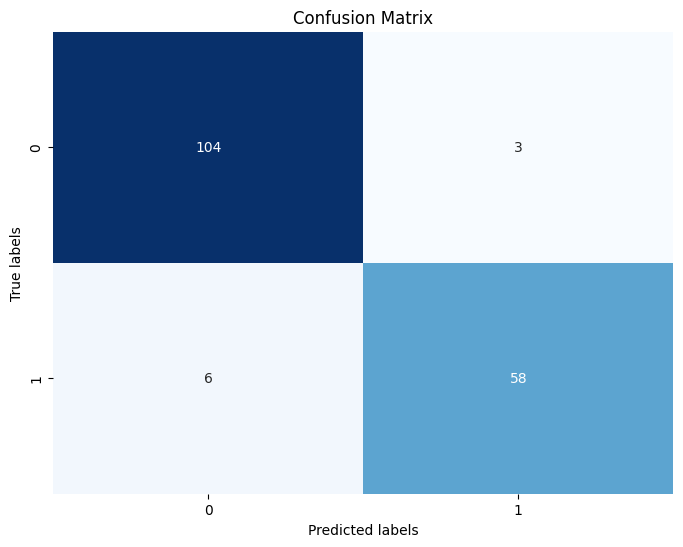

In [84]:
!pip install flaml[automl]
from flaml import AutoML
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a classification task
automl = AutoML()
settings = {
    "time_budget": 300,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
}

# Search for the best model and hyperparameters
automl.fit(X_train=X_train, y_train=y_train, **settings)

# Make predictions on the test set
y_pred = automl.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
